<center>



<img src="Five%20Year%20Plan.jpg" alt="Five%20Year%20Plan.jpg" width="500"/>

# Проект по Анализу Данных (ФЭН 2023)
</center>



**Выполнила:** Наумова Дарья Александровна

**id из контеста:** dap_econ_2022_252

## Шаг 1: Выбор темы

В качестве темы проекта я выбрала **анализ рынка ноутбуков в России**. 

**Цель**: посмотреть на распределение характеристик ноутбуков, выявить, какие связи прослеживаются между этими характеристиками, а также отследить, как формируется цена ноутбука в зависимости от соответствующих признаков.

## Шаг 2: Сбор данных

Данные для анализа я решила парсить с известного российского маркетплейса **Wildberries** — онлайн-магазина одежды, обуви, электроники, детских товаров, товаров для дома и др. Изначально еще рассматривались такие площадки, как Яндекс-Маркет, Озон, Ситилинк и иные, однако Wildberries больше подошёл мне в связи с достаточным количеством наблюдений и довольно чёткой структурой сайта, что облегчает парсинг.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sts

%config InlineBackend.figure_format='retina'

sns.set_palette('RdBu')
sns.set_style('whitegrid')

Технический скрипт с парсером, где подгружаются данные с [сайта](https://www.wildberries.ru/catalog/elektronika/noutbuki-pereferiya/noutbuki-ultrabuki?sort=popular&page=1) (всех 17-ти его страниц) находится в файле `Парсер Wildberries`.

Посмотрим на полученные данные:

In [2]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Емкость аккумулятора,Вес,Операционная система
0,Ноутбук Megabook T1 (i5) 16/512Гб (Linux),43 230 ₽,"15.6""",512 Гб,16 ГБ,4,"документация, адаптер питания",70 Вт*Ч,1.48 кг,Linux
1,"Ноутбук ASUS VivoBook 15 15.6""FHD OLED I5/8Gb/...",75 800 ₽,15.6,512,8 ГБ,4,"Ноутбук, зарядное устройство, документация",NaN,1.4 кг,Windows Home
2,"Ноутбук 15.6"" Notebook Pink Intel Celeron N509...",32 679 ₽,15.6,512 Гб,16,NaN,коробка; ноутбук; накладка на клавиатуру,NaN,NaN,NaN
3,Ноутбук Lenovo Ideapad 3 Intel Core i3-1115G4,39 800 ₽,15.6,256 Гб,4,4,"Ноутбук, зарядное устройство, сетевой адаптер",NaN,1.5 кг,Windows Pro
4,"Ноутбук Acer Aspire 3 17.3""i5 1135G7/8Gb/512Gb...",76 970 ₽,17.3,512,8 ГБ,4,"Ноутбук, блок питания, документация",NaN,2.6 кг,Без системы
...,...,...,...,...,...,...,...,...,...,...
1101,"Ноутбук AZ-1511 15.6""/4x2.0Ghz/16Gb/256Gb",28 025 ₽,15.6'',256 Гб,16 ГБ,4,Блок питания - 1 шт; Ноутбук - 1 шт,5000 mAh,1.9 кг,Windows
1102,Ноутбук Lenovo Thinkbook 15 G2 ITL Intel Core ...,61 725 ₽,15.6,256 Гб,8 ГБ,4,Ноутбук - 1 шт,NaN,1.7 кг,WIN11 Pro
1103,"Ноутбук Acer NX.ABDER.007(i5/16,1/256Гб/8Гб/UM...",50 760 ₽,"16.1""",256 Гб,8 ГБ,4,NaN,NaN,NaN,noOS
1104,"Ноутбук Gigabyte AORUS 15P KD (15.6 "", FHD 192...",205 000 ₽,"15.6 """,1 Тб,16 ГБ,8 шт; 8 Ядер 16 потоков,NaN,6700 mAh,2.29 кг,Windows 11 Home


Итак, у нас есть **1106** ноутбуков.

## Шаг 3: Предварительная обработка данных

Для начала посмотрим на колонки и поработаем с ними (вернее, с тем, что в них находится).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  1106 non-null   object
 1   Цена                        1106 non-null   object
 2   Диагональ экрана            1104 non-null   object
 3   Объем накопителя SSD        1106 non-null   object
 4   Объем оперативной памяти    1103 non-null   object
 5   Количество ядер процессора  1082 non-null   object
 6   Комплектация                815 non-null    object
 7   Емкость аккумулятора        541 non-null    object
 8   Вес                         817 non-null    object
 9   Операционная система        1062 non-null   object
dtypes: object(10)
memory usage: 86.5+ KB


**Переименуем** колонку `Unnamed: 0`; в ней лежат **названия ноутбуков** (пока не будем от них избавляться, так как они могут пригодиться, чтобы извлечь из названия какой-либо новый признак):  

In [4]:
df = df.rename({'Unnamed: 0': 'Название'}, axis = 1)

Теперь обработаем и опишем каждую из колонок. Выше мы переименовали первую колонку:

`Название` - наименование ноутбука + некоторые характеристики (то, что видит пользователь, когда скроллит ленту WB)

Теперь поработаем с колонкой `Цена`. В ней находятся значения типа `object`, а нам необходимо смотреть на цену как на числовой признак. Удалим лишние символы и преобразуем колонку в тип `integer`:

In [5]:
df['Цена'] = df['Цена'].apply(lambda x: int(x.strip(' ₽ ').replace(' ', '')))

Следующая колонка - `Диагональ экрана`.  Это числовой признак, поэтому нужно преобразовать его в тип `float`. Посмотрим, какие значения находятся в этой колонке:

In [6]:
df['Диагональ экрана'].unique()[:10]

array(['15.6"', '15.6', '17.3', '15,6"', '15,6 дюйма 1920*1080', '15',
       '15,6', '14.1"', '14', '16,2"'], dtype=object)

Напишем функцию, которая будет "вычленять" из значения только нужное нам число:

In [7]:
def diag(x):
    if len(str(x)) > 4:
        x = str(x)[:4] # число, обозначающее диагональ экрана, состоит из 2-4 символов. 
    x = float(str(x).replace(',','.').
              strip('"').strip(';').
              strip("''").strip('""').
              strip('д').strip('(').
              strip('”').strip())
    return(x)

In [8]:
df['Диагональ экрана'] = df['Диагональ экрана'].apply(diag)

Теперь посмотрим на пропуски.

In [9]:
df['Диагональ экрана'].isna().sum()

2

Получаем 2 ноутбука с отсутствующей диагональю экрана. Посмотрим на них:

In [10]:
df[df['Диагональ экрана'].isna()]

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Емкость аккумулятора,Вес,Операционная система
109,Ноутбук Hiper DZEN MTL1569 цвет серебристый,55990,NaN,512 гб,16 гб,4-ядерный,"Ноутбук-1шт., инструкция-1шт.,гарантийный тало...",NaN,NaN,Free DOS
900,Apple MacBook Pro 16 Z14V0008D (русская клавиа...,261301,NaN,512,32,10,macbook pro; Адаптер питания USB‑C мощностью 1...,100 Вт/ч,NaN,Mac OS


Заполним пропуски медианой (нулем заполнять нецелесобразно, так как не бывает нулевой диагонали экрана; извлечь же значение диагонали не получается - в названии товаров она не указана):

In [11]:
df['Диагональ экрана'].fillna(df['Диагональ экрана'].median(), inplace = True)

Следующие две колонки - `Объем накопителя SSD` и `Объем оперативной памяти`. Обработаем их вместе с помощью функции `memory`:

In [12]:
df['Объем накопителя SSD'].unique()[:10]

array(['512 Гб', '512', '256 Гб', '1 Тб', '512 гб.', 'Отсутствует',
       '256 ГБ', '1024 Гб', '256', '1 ТБ'], dtype=object)

In [13]:
def memory(x):
    x = str(x).split(';')[0]
    x = re.sub(r'[ГбБайтгGBbgTtТт(DDR)Макс]', '', x).strip('.').strip()
    if x == '1': # в данных есть несколько ноутбуков с памятью в 1 Терабайт: заменим их на 1024 Гб
        x = '1024'
    if x.isalpha(): # для значений без цифр (напр. "Отсутствует")
        x = 0
    try:
        return float(x)
    except:
        return np.nan

In [14]:
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].apply(memory)
df['Объем оперативной памяти'] = df['Объем оперативной памяти'].apply(memory)
df.head()

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Емкость аккумулятора,Вес,Операционная система
0,Ноутбук Megabook T1 (i5) 16/512Гб (Linux),43230,15.6,512.0,16.0,4,"документация, адаптер питания",70 Вт*Ч,1.48 кг,Linux
1,"Ноутбук ASUS VivoBook 15 15.6""FHD OLED I5/8Gb/...",75800,15.6,512.0,8.0,4,"Ноутбук, зарядное устройство, документация",NaN,1.4 кг,Windows Home
2,"Ноутбук 15.6"" Notebook Pink Intel Celeron N509...",32679,15.6,512.0,16.0,NaN,коробка; ноутбук; накладка на клавиатуру,NaN,NaN,NaN
3,Ноутбук Lenovo Ideapad 3 Intel Core i3-1115G4,39800,15.6,256.0,4.0,4,"Ноутбук, зарядное устройство, сетевой адаптер",NaN,1.5 кг,Windows Pro
4,"Ноутбук Acer Aspire 3 17.3""i5 1135G7/8Gb/512Gb...",76970,17.3,512.0,8.0,4,"Ноутбук, блок питания, документация",NaN,2.6 кг,Без системы


Посмотрим на пропуски:

In [15]:
df[['Объем накопителя SSD', 'Объем оперативной памяти']].isna().sum()

Объем накопителя SSD        0
Объем оперативной памяти    3
dtype: int64

In [16]:
df['Объем накопителя SSD'].unique()

array([ 512.,  256., 1024.,    0.,  128.,  240.,  120., 1000., 2048.,
        500.])

Удалим ноутбуки с нулевой памятью SSD (скорее всего, это даже не ноутбук, а случайно попавший в список ноутбуков товар). Минимальная оперативная память у ноутбука - 2 ГБ (нулём заполнять не стоит), поэтому заполним пропуски в колонке `Объем оперативной памяти ` медианным значением. 

In [17]:
df = df[df['Объем накопителя SSD'] != 0].reset_index(drop = True)
df.shape

(1098, 10)

In [18]:
df['Объем оперативной памяти'].unique()

array([16.,  8.,  4., 12., 32.,  6., 24., 64., nan, 20.,  0.])

In [19]:
df[df['Объем оперативной памяти'] == 0] = np.nan
df['Объем оперативной памяти'].fillna(df['Объем оперативной памяти'].median(), inplace=True)

Теперь у нас 1098 наблюдений.

Следующая колонка - `Количество ядер процессора`. Значением должно быть число: обработаем наши данные с помощью функции `cores`:

In [20]:
df['Количество ядер процессора'].unique()

array(['4', nan, '2', '6', '4-ядерный', '8', '10', '12', '14',
       '14-ядерный', '2 ядра', '4 ядра', '8 ядер 12 потоков', '4 ядер',
       '6; 6 ядер; 6 шт', '4 ядер / 8 потоков', '4 ядра (8 потоков)',
       '8-ядерный', '4 ядра 4 потока', '2-ядерный', '4 ядра 8 потоков',
       '6 шт', 'четырехъядерный', '6 ядер', '2 ядер; 2 шт; 2', '4 шт',
       '2; два ядра; двухядерный', '2 шт; 2 шт; 2', '2 ядра (4 потока)',
       '2; два ядра', '16', '6; 6 шт.; 6 ядер', '10 ядер / 16 потоков',
       '12 ядер; Количество ядер Neural Engine 16', '6-ядерный', '2 ядер',
       '8 ядер', '6 ядер; 6 шт; 6', '14 ядер; 14',
       '4 ядра 8 потоков; 4 ядра; 8 потоков', '12-ядерный', '2 шт',
       '2 ядра 4 потока', '8 шт; 8 Ядер 16 потоков'], dtype=object)

In [21]:
def cores(x):
    if x == 'четырехъядерный':
        x = 4
    try:
        x = int((str(x).strip('Количество ядер Neural Engine ') + '&')[:2]. #склеиваем с &, чтобы всегда можно было сделать срез
                strip('&').strip(';').
                strip('-').strip('&').strip())
    except:
        x = np.nan
    return x

In [22]:
df['Количество ядер процессора'] = df['Количество ядер процессора'].apply(cores)
df['Количество ядер процессора'].isna().sum()

25

In [23]:
df['Количество ядер процессора'].unique() # нулевых значений нет

array([ 4., nan,  2.,  6.,  8., 10., 12., 14., 16.])

Заполним 26 пропусков медианой:

In [24]:
df['Количество ядер процессора'].fillna(df['Количество ядер процессора'].median(), inplace=True)

С колонкой `Комплектация` пока работать не будем: она может пригодиться, когда будем создавать новые признаки. Пока оставим ее в неизменном виде.

Следующая колонка - `Емкость аккумулятора`. Посмотрим, сколько в ней пропусков:

In [25]:
df['Емкость аккумулятора'].isna().sum()

563

У более, чем половины ноутбуков (564 из 1098) пропущена ёмкость аккумулятора. Удалим этот признак:

In [26]:
df = df.drop('Емкость аккумулятора', axis = 1)

Теперь обработаем колонку `Вес`:

In [27]:
def weight(x):
    try:
        x = float(str(x).strip('кг').strip())
    except:
        x = np.nan
    return x

In [28]:
df['Вес'] = df['Вес'].apply(weight)
df['Вес'].isna().sum()

290

Заполним пропуски медианным значением:

In [29]:
df['Вес'].fillna(df['Вес'].median(), inplace=True)

Последняя колонка - `Операционная система`. Посмотрим, какие значения в ней встречаются:

In [30]:
df['Операционная система'].unique()[:20]

array(['Linux', 'Windows Home', nan, 'Windows Pro', 'Без системы',
       'Без ОС', 'DOS', 'Windows 11 Home', 'noOS', 'Windows',
       'Windows 11 rus', 'Windows 11 Pro', 'Free DOS', 'отсутствует',
       'нет', 'macOS', 'не установлена', 'Windows 10 Pro',
       'Windows 10 Home', 'NoOC'], dtype=object)

Это **категориальный признак**. Упростим его значения (впоследствии может пригодиться для OHE или формирования новых признаков).

Все операционные системы Windows (любые ее версии) сведем к простому `Windows`. По такому же признаку обозначим все ноутбуки с любой версией ОС Linux за `Linux` (сюда же я отнесла ноутбуки с Endless OS, так как она [основана на Linux](https://it-doc.info/endless-os-chto-eto-takoe/)), а макбуки - за `macOS`. 
Ноутбуки с операционной системой DOS обозначим за `DOS`.

Все остальные ноутбуки в качестве значения в колонке `Операционная система` имеют `нет`/`отсутствует`/`без ОС` etc. Обозначим ноутбуки без операционной системы за `noOS`. Пропуск в этой колонке имеет важное значение: скорее всего, это означает, что ОС на ноутбуке не установлена. Поэтому заполним пропуски значением `noOS`.

In [31]:
def OS(x):
    k = ''.join(str(x).split())
    if ('Win' in k) or ('WIN' in k) or ('win' in k):
        x = 'Windows'
    elif ('Lin' in k) or ('LIN' in k) or ('Lun' in k) or ('Endless' in k):
        x = 'Linux'
    elif ('mac' in k) or ('Mac' in k):
        x = 'macOS'
    elif ('DOS' in k) or ('Dos' in k):
        x = 'DOS'
    for elem in ['No', 'no', 'не', 'без', 'отсут', 'Без']:
        if elem in k:
            x = np.nan
    return x

In [32]:
df['Операционная система']  = df['Операционная система'].apply(OS)
df['Операционная система'].unique()

array(['Linux', 'Windows', nan, 'DOS', 'macOS'], dtype=object)

In [33]:
df['Операционная система'].fillna('noOS', inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Название                    1095 non-null   object 
 1   Цена                        1095 non-null   float64
 2   Диагональ экрана            1095 non-null   float64
 3   Объем накопителя SSD        1095 non-null   float64
 4   Объем оперативной памяти    1098 non-null   float64
 5   Количество ядер процессора  1098 non-null   float64
 6   Комплектация                808 non-null    object 
 7   Вес                         1098 non-null   float64
 8   Операционная система        1098 non-null   object 
dtypes: float64(6), object(3)
memory usage: 77.3+ KB


Откуда-то появились строки с пропусками в названии и цене. Посмотрим на них:

In [35]:
df[df['Название'].isna()]

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Вес,Операционная система
447,NaN,NaN,NaN,NaN,8.0,4.0,NaN,1.74,noOS
1087,NaN,NaN,NaN,NaN,8.0,4.0,NaN,1.74,noOS
1089,NaN,NaN,NaN,NaN,8.0,4.0,NaN,1.74,noOS


Значения у этих наблюдений имеются только в тех столбцах, в которых мы пользовались заполнением пропусков. Удалим эти строчки из таблицы:

In [36]:
df = df.dropna (subset=['Название']).reset_index(drop = True)
df.shape

(1095, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Название                    1095 non-null   object 
 1   Цена                        1095 non-null   float64
 2   Диагональ экрана            1095 non-null   float64
 3   Объем накопителя SSD        1095 non-null   float64
 4   Объем оперативной памяти    1095 non-null   float64
 5   Количество ядер процессора  1095 non-null   float64
 6   Комплектация                808 non-null    object 
 7   Вес                         1095 non-null   float64
 8   Операционная система        1095 non-null   object 
dtypes: float64(6), object(3)
memory usage: 77.1+ KB


In [38]:
df.to_csv('WB_laptops_dataset')

Так-то лучше! Теперь в данных нет пропусков (кроме колонки `Комплектация`, но её мы на данный момент игнорируем). 

## Шаг 4. Explorary Data Analysis и Визуализация

Для начала посмотрим на некоторые **статистики для непрерывных переменных** (отметим следующее обстоятельство: истинно непрерывными, скорее всего, из исходных переменных являются лишь `Цена` и `Вес`; остальные принимают значения из определенного множества). Но мы будем работать с ними как с числовыми и посмотрим на их распределение.

In [39]:
df.describe()

,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Вес
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,79255.839269,15.322831,482.736073,11.404566,5.479452,1.779717
std,53893.651699,0.872351,262.011029,5.765986,3.169105,0.296609
min,14630.000000,11.600000,120.000000,4.000000,2.000000,0.970000
25%,44063.000000,15.600000,256.000000,8.000000,4.000000,1.700000
50%,64253.000000,15.600000,512.000000,8.000000,4.000000,1.740000
75%,94338.500000,15.600000,512.000000,16.000000,8.000000,1.860000
max,410000.000000,17.300000,2048.000000,64.000000,16.000000,3.100000


**Итак, основные выводы:**

`Цена`: **В среднем** ноутбук стоит 79 с небольшим тысяч рублей, однако **медианная цена** (50% квантиль) меньше среднего значения и составляет 64338. Вероятно, в выборке есть ноутбуки с очень высокой ценой. Довольно велико **стандартное отклонение** цены ноутбука: оно составляет более 50 тысяч рублей. 

`Диагональ`: **Разброс** у диагонали не велик, **наименьшее значение** составляет 11.6, **наибольшее** - 17.3. **Медианное значение** диагонали экрана составляет 15.6.

`Объем накопителя SSD`: **Разброс** довольно высокий: значения находятся в диапазоне от 20 до 1024 Гигабайт. **Медианное значение** - 512 ГБ.

`Объем оперативной памяти`: **Медианное значение** объема оперативной памяти - 8 ГБ. **Минимальное значение** - 2, **максимальное** - 32.

`Количество ядер процессора`: Переменная принимает значения от 2 до 16, **медиана** - 8.

`Вес`: **В среднем**, ноутбук весит 1 килограмм 700 граммов. Самый тяжелый ноутбук весил более 3 килограммов, самый лёгкий - менее килограмма. 



Посмотрим на распределение категориальных переменных (точнее, категориальнОЙ переменнОЙ) - **`Операционная система`**. Остальные переменные типа object на данный момент нам не интересны (`Комплектация` еще не обработана, в `Названии` пока не содержится значимой информации).

In [40]:
df['Операционная система'].describe(include='object')

count        1095
unique          5
top       Windows
freq          560
Name: Операционная система, dtype: object

Итак, в ноутбуках на Wildberries чаще всего стоит операционная система Windows (даже чаще, чем не стоит ничего!).

Посмотрим на распределение операционных систем в ноутбуках.

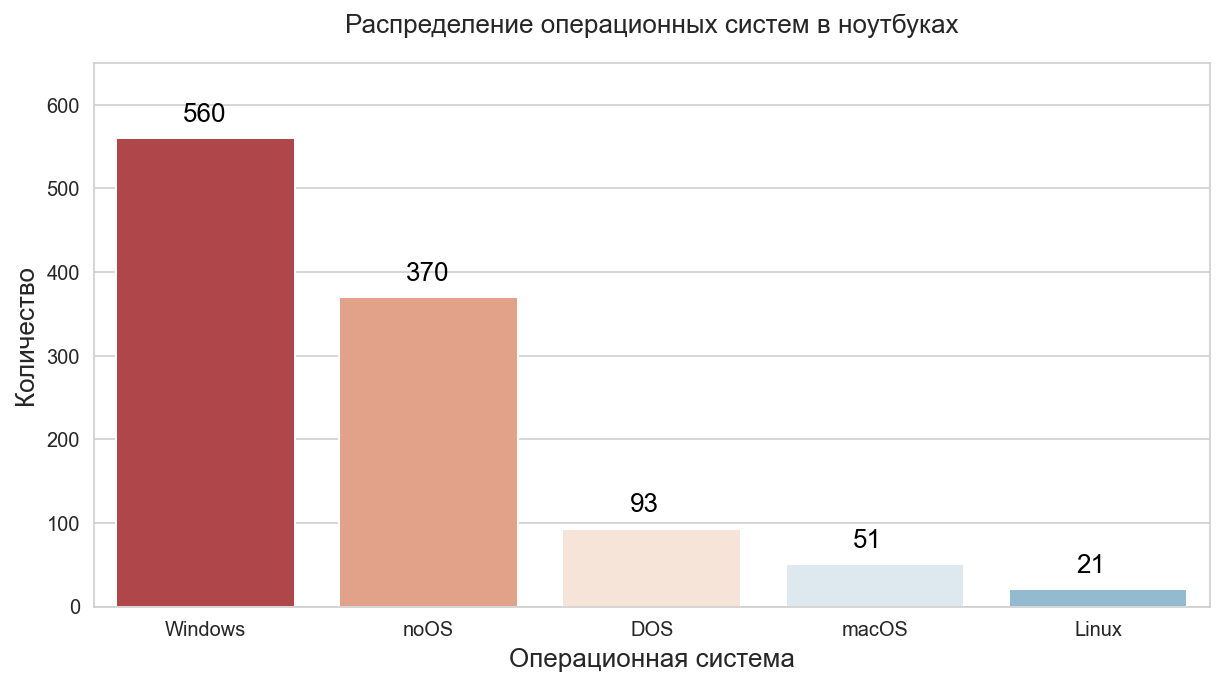

In [41]:
plt.figure (figsize = (10, 5))
fig = sns.countplot(x='Операционная система', data=df, order= df.groupby('Операционная система').
                                                        size().sort_values(ascending = False).index)
plt.title ('Распределение операционных систем в ноутбуках', pad = 15, fontsize = 13)
plt.ylabel('Количество', fontsize = 13)
plt.xlabel('Операционная система', fontsize = 13)
plt.ylim(0,650)
for p in fig.patches:
    fig.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+20), color='black', size=13)

Итак, на первом месте, как уже было упомянуто выше, находится `Windows`. За ним следует отсутствие операционной системы, затем `DOS`, после `MAC` и на последнем месте `Linux`. Посмотрим на распределение цены ноутбуков и проследим, есть ли какие-либо закономерности между ценой ноутбука и наличием в нем определенной операционной системы.

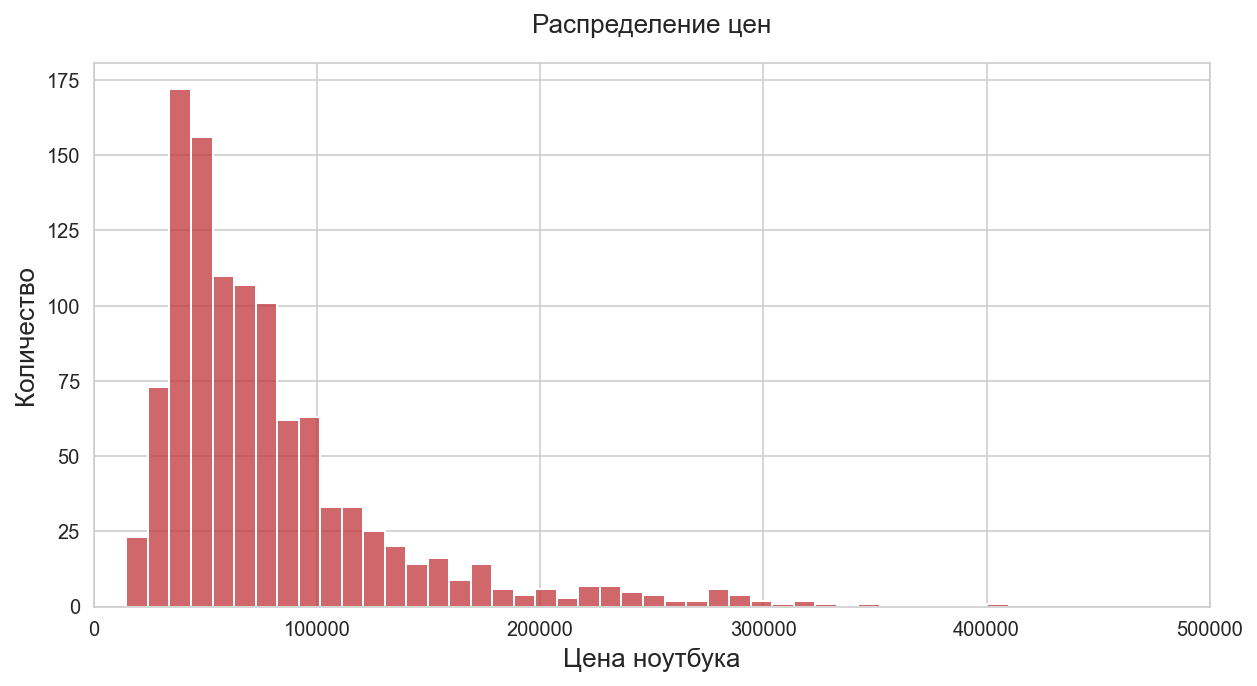

In [42]:
plt.figure (figsize = (10, 5))
sns.histplot(df['Цена'])
plt.xlim(0, 500000)
plt.title ('Распределение цен', pad = 15, fontsize = 13)
plt.ylabel('Количество', fontsize = 13)
plt.xlabel('Цена ноутбука', fontsize = 13);

Распределение выглядит несколько смещенным, есть выбросы (один или несколько ноутбуков попали в диапазон за 400 000 рублей). Чтобы сгладить выбросы и чётче увидеть природу данных, попробуем прологарифмировать цену:

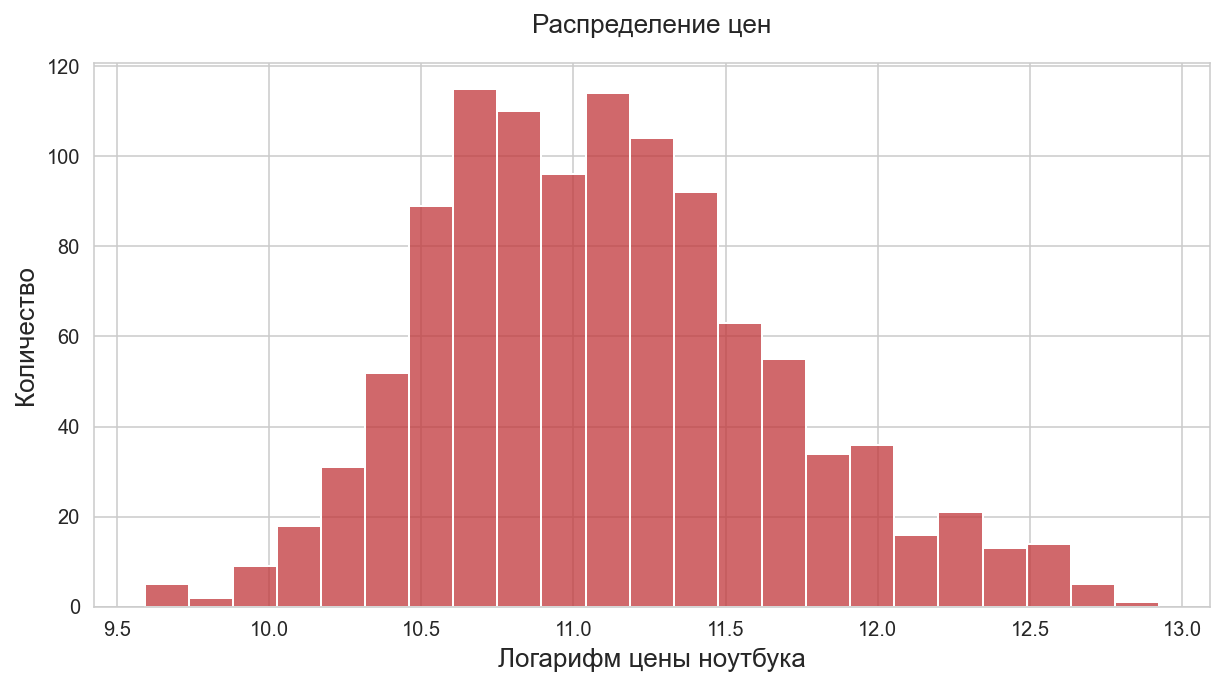

In [43]:
plt.figure (figsize = (10, 5))
sns.histplot(df['Цена'].apply(lambda x: np.log(x+1)))
plt.title ('Распределение цен', pad = 15, fontsize = 13)
plt.ylabel('Количество', fontsize = 13)
plt.xlabel('Логарифм цены ноутбука', fontsize = 13);

Распределение логарифма цены ноутбука похоже на нормальное. Построим график `Квантиль-квантиль`, чтобы посмотреть, насколько распределение походит на нормальное.

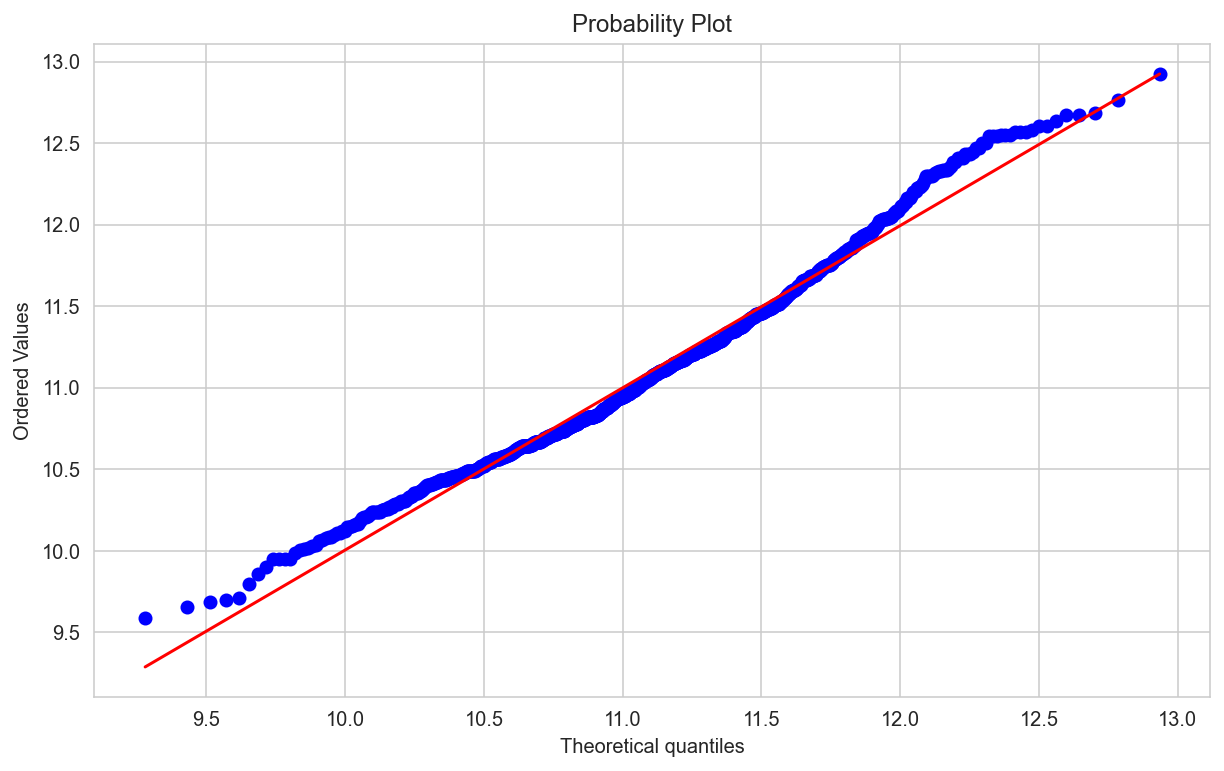

In [44]:
plt.figure (figsize = (10, 6))
ax = plt.subplot()
x = df['Цена'].apply(lambda x: np.log(x+1)).values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot = ax);

Заметим, что распределение логарифма цены в центре действительно близко к нормальному, но квантили на хвостах отклоняются в более тяжелую сторону.

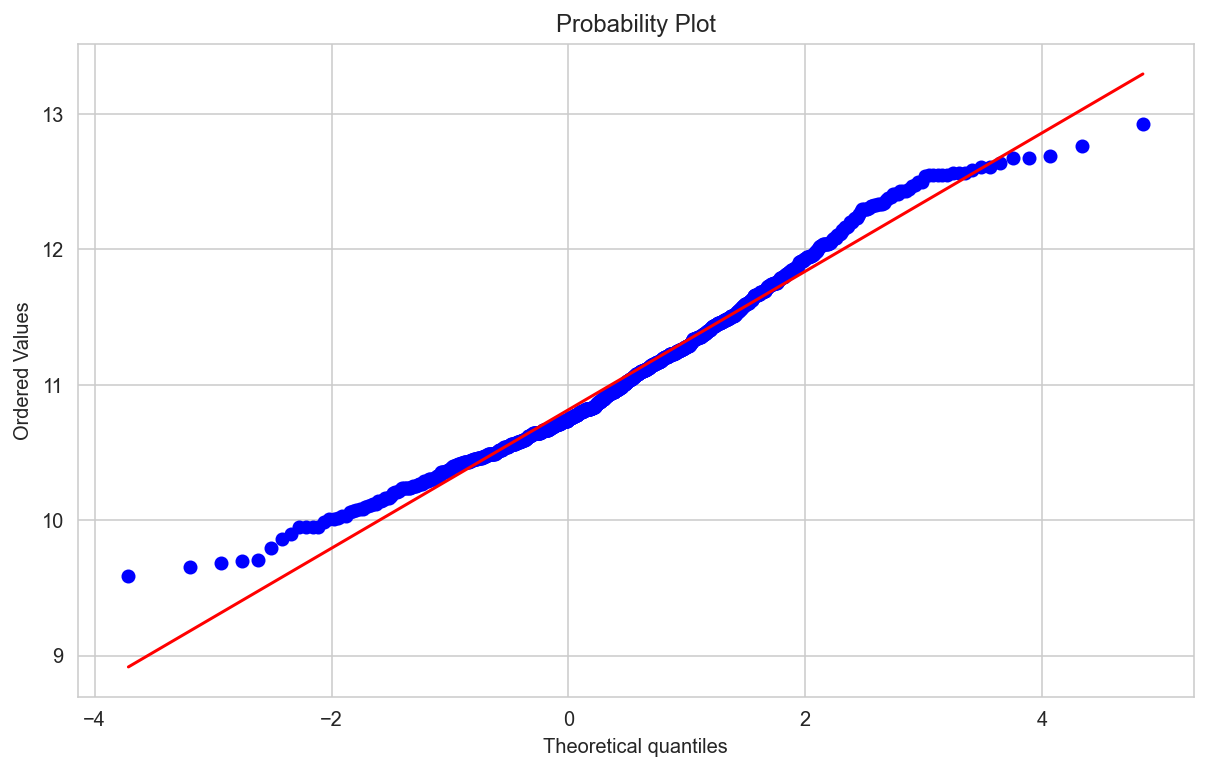

In [45]:
plt.figure (figsize = (10, 6))
ax = plt.subplot()
x = df['Цена'].apply(lambda x: np.log(x+1)).values
sts.probplot(x, dist="t", sparams=(x.mean(), x.std()), plot = ax);

Визуально Стъюдент подходит меньше, чем нормальное рапсределение.

Возникает *предположение*: а может ли наличие определенной операционной системы влиять на цену ноутбука? Интуиция подсказывает, что должна: как минимум, если в ноутбуке стоит операционная система, логично, что он должен быть дороже ноутбука без операционной системы. Проверим это, посмотрев на характеристики и распределение цен ноутбуков с определенной операционной системой + опровергнем/подтвердим наше предположение, проверив соответствующую гипотезу (в пункте "Проверка гипотез").

In [46]:
MAC = df[df['Операционная система'] == 'macOS']['Цена']
WIN = df[df['Операционная система'] == 'Windows']['Цена']
LIN = df[df['Операционная система'] == 'Linux']['Цена']
DOS = df[df['Операционная система'] == 'DOS']['Цена']
no = df[df['Операционная система'] == 'noOS']['Цена']

Напишем функцию **`charact`** , которая будет считать основные характеристики, а также рисовать гистограммы распределения цены и логарифма цены ноутбука. 

In [47]:
def charact(x):
    print (f'Количество ноутбуков: {x.shape[0]}')
    print (f'Среднее значение цены: {x.mean()}')
    print (f'Медианное значение цены: {x.median()}')
    print (f'Стандартное отклонение цены: {x.std()}')
    figs, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(x, ax = axes[0])
    axes[0].set_title('Распределение цены ноутбука', pad = 15)
    
    sns.histplot(x.apply(lambda x: np.log(x+1)), ax = axes[1], color = 'wheat')
    plt.xlabel('Логарифм цены ноутбука')
    axes[1].set_title('Распределение логарифма цены ноутбука', pad = 15)

Начнем с ноутбуков с операционной системой `MAC`:

Количество ноутбуков: 51
Среднее значение цены: 220235.64705882352
Медианное значение цены: 226791.0
Стандартное отклонение цены: 60600.10947443033


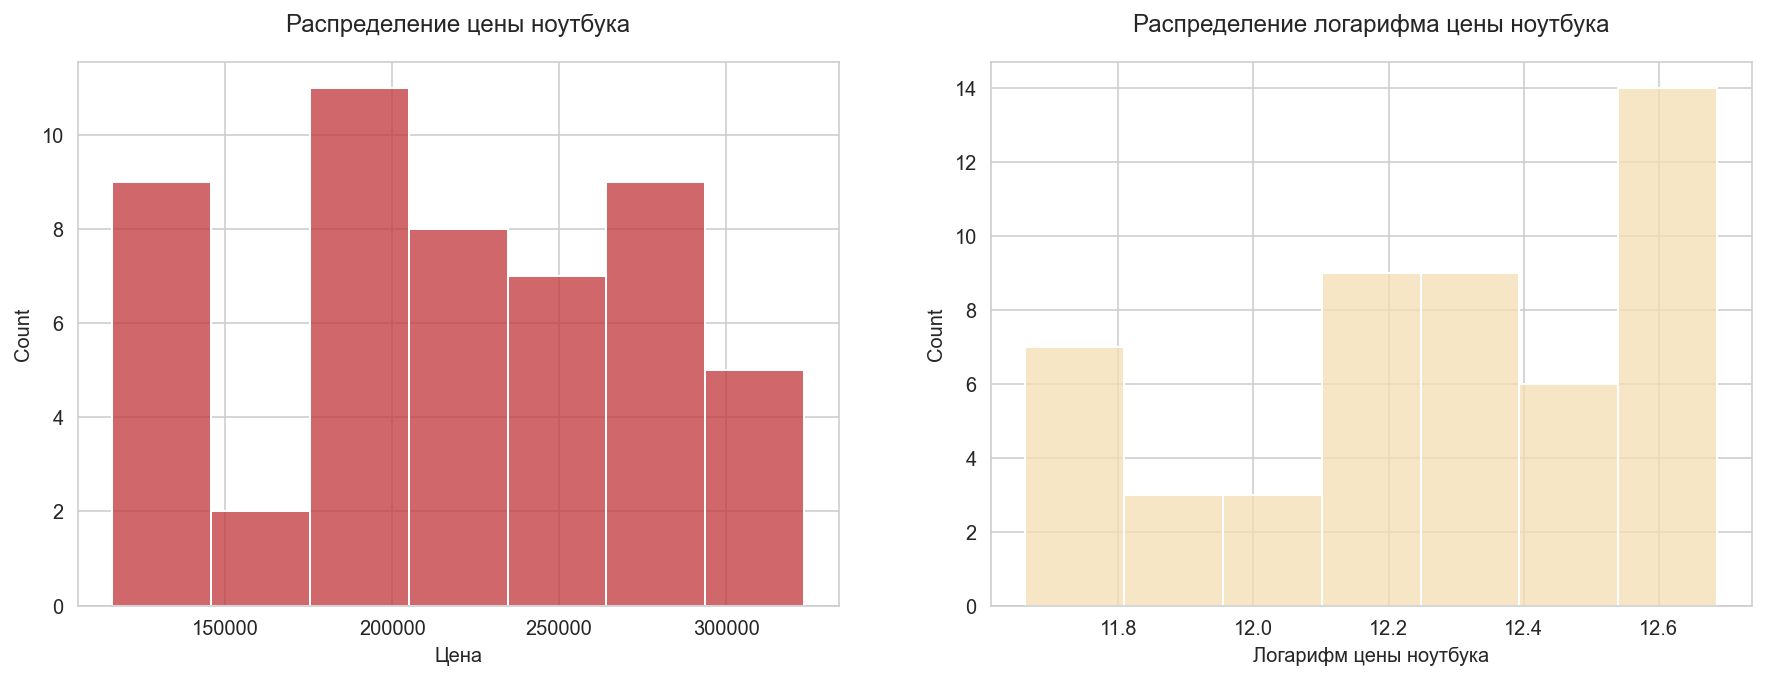

In [48]:
charact(MAC)

Гистограмма получилась не очень показательной, так как очень мало наблюдений (всего 51). Стоит сразу подметить, что медиана цены и ее среднее значение сильно превышают эти показатели по всем ноутбукам. Возникает предположение (тоже вполне логичное), что ноутбуки с операционной системой MAC - то есть ноутбуки компании Apple - стоят дороже. Тогда можно задуматься о создании переменной, отвечающей за принадлежность гаджета производству компании Apple.

Посмотрим на ноутбуки с операционной системой `Windows`:

Количество ноутбуков: 560
Среднее значение цены: 72032.4517857143
Медианное значение цены: 58402.0
Стандартное отклонение цены: 47688.00825886035


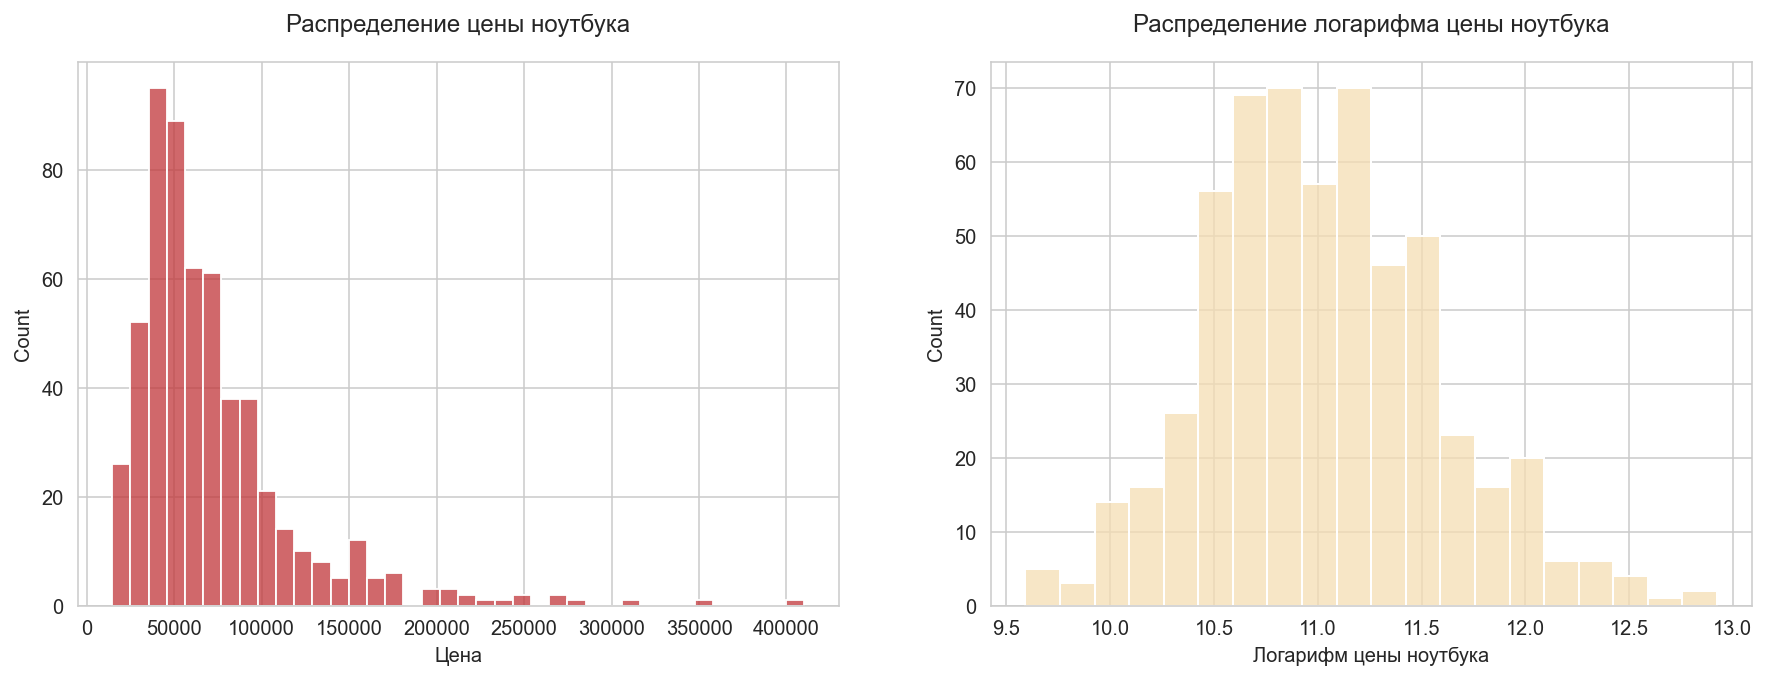

In [49]:
charact(WIN)

Распределение ноутбуков с операционной системой Windows очень напоминает полученное ранее распределение всех ноутбков (что вполне логично, ведь ноутбуки с Windows составляют большую часть выборки. Потому среднее значение и медиана находятся рядом со значениями по всей выборке. 

Посмотрим на ноутбуки с операционной системой `Linux`:

Количество ноутбуков: 21
Среднее значение цены: 54526.0
Медианное значение цены: 42990.0
Стандартное отклонение цены: 26782.90436080449


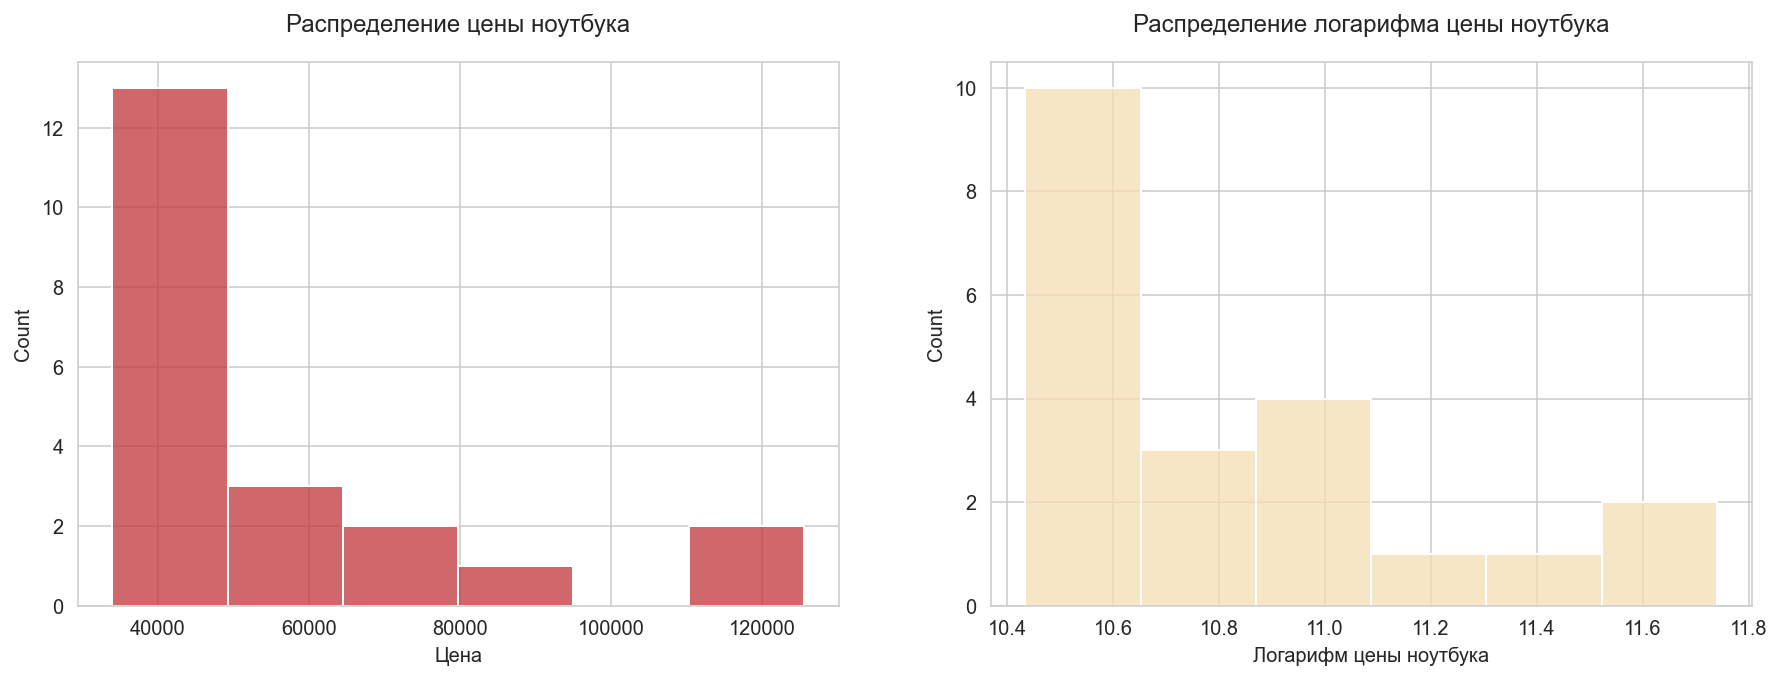

In [50]:
charact(LIN)

Наблюдений мало - всего 21, поэтому гистограммы не так показательны. Однако стоит отметить, что в среднем ноутбуки с операционной системой Linux стоят в районе 55 тысяч рублей при медиане в ~ 43 тысячи рублей. 

Посмотрим на ноутбуки с операционной системой `DOS`:

Количество ноутбуков: 93
Среднее значение цены: 67231.97849462366
Медианное значение цены: 63289.0
Стандартное отклонение цены: 28373.46122392577


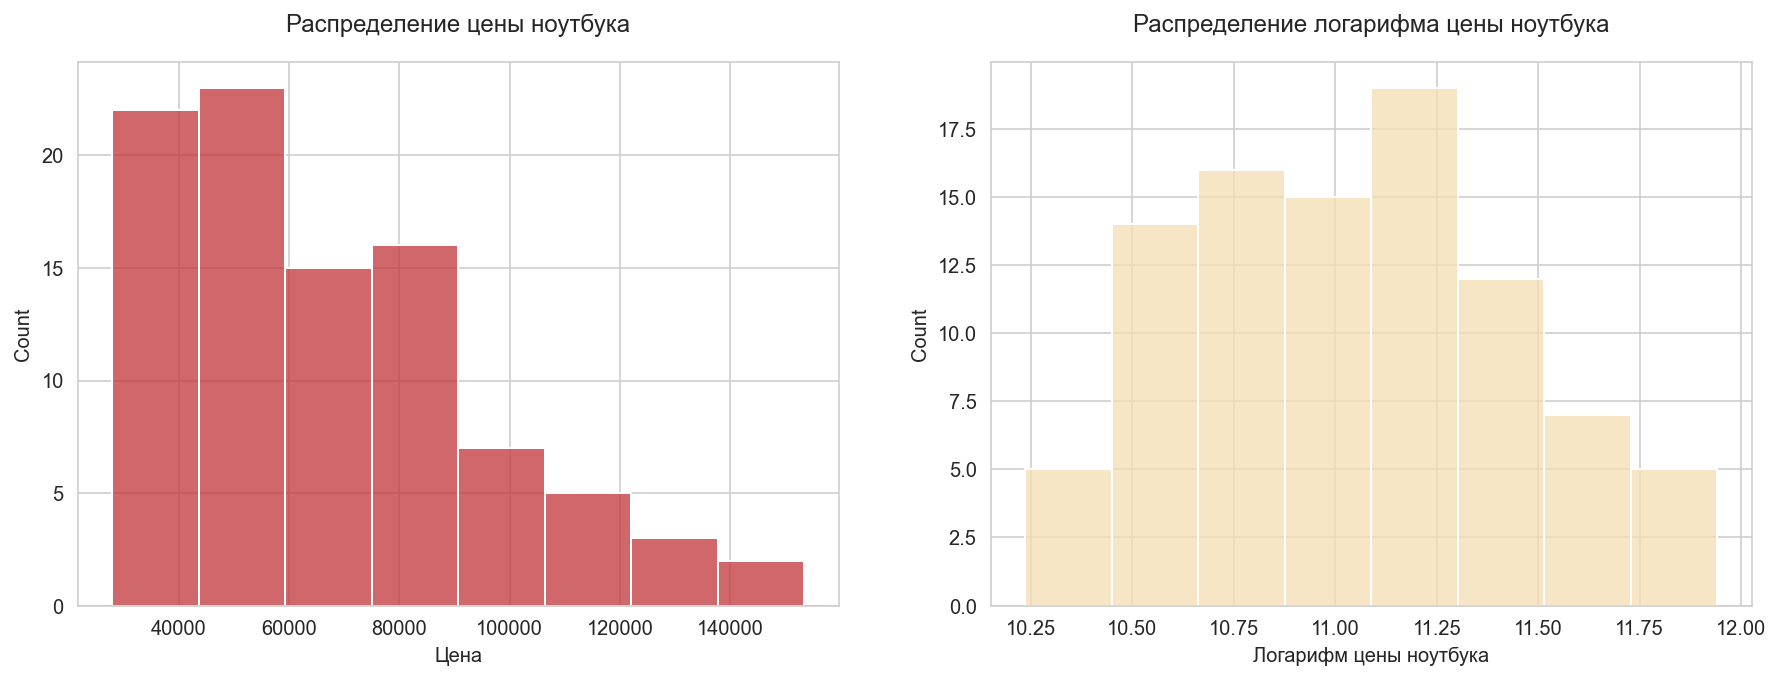

In [51]:
charact(DOS)

Графики напоминают те, что были для общего числа ноутбуков (хотя количество ноутбуков с операционной системой DOS не так велико). Среднее значение и медиана близки и тоже находятся около значений по всей выборке.

Осталось посмотреть на ноутбуки без операционной системы:

Количество ноутбуков: 370
Среднее значение цены: 75181.98108108107
Медианное значение цены: 66838.0
Стандартное отклонение цены: 38921.24778895847


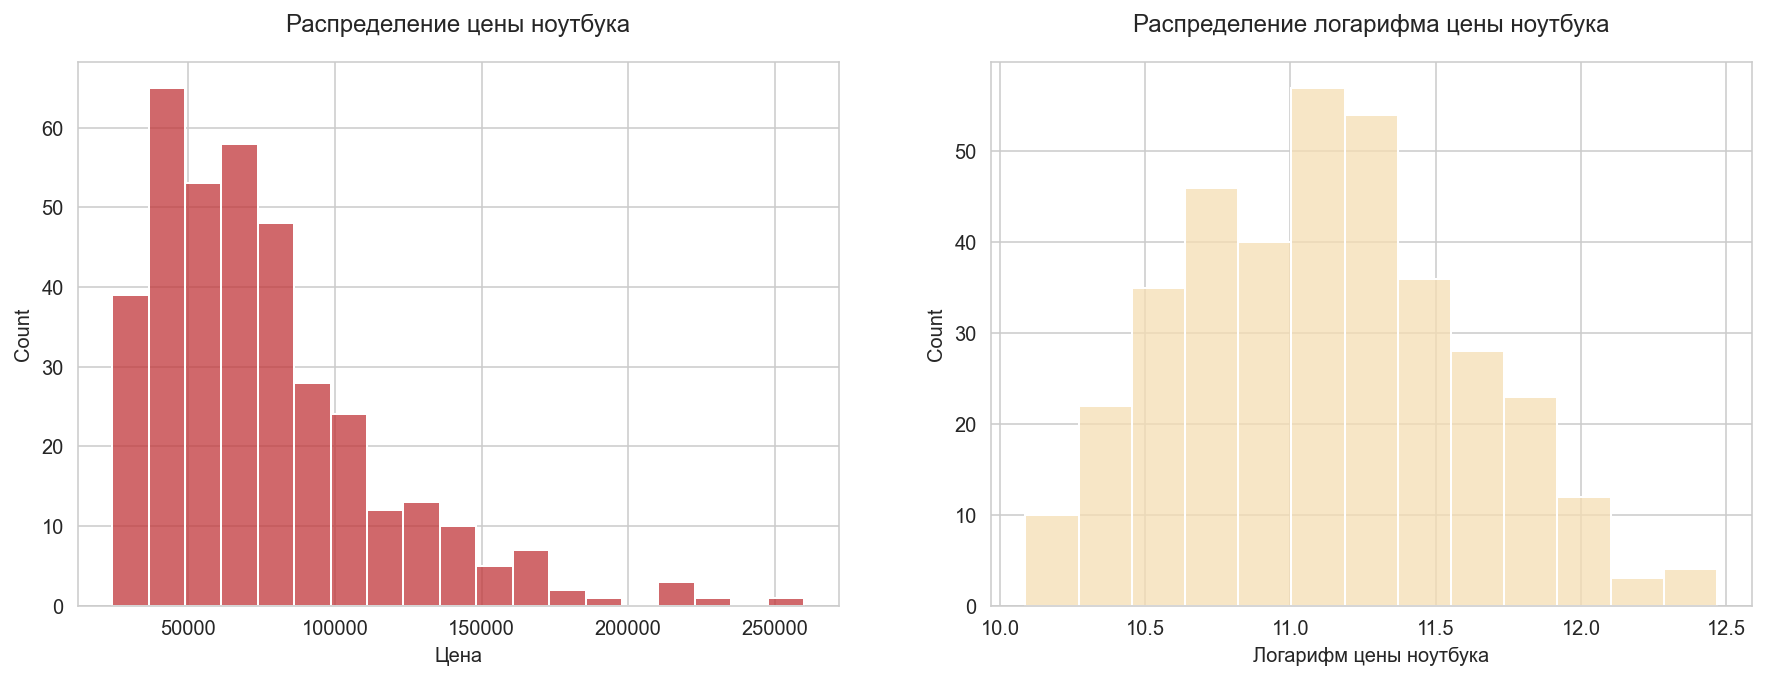

In [52]:
charact(no)

Получаем некоторое противоречие: среднее значение и медиана цены ноутбука без операционной системы выше этих статистик для ноутбука с Windows, Linux и DOS. Может, не так уж наличие операционной системы в принципе влияет на цену? (не берем в расчет наличие macOS, там дело скорее в бренде, чем в OS). Попробуем создать новую переменную.

In [53]:
df['Есть ли ОС?'] = 1*(df['Операционная система'] != 'noOS')
df.head(2)

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Вес,Операционная система,Есть ли ОС?
0,Ноутбук Megabook T1 (i5) 16/512Гб (Linux),43230.0,15.6,512.0,16.0,4.0,"документация, адаптер питания",1.48,Linux,1
1,"Ноутбук ASUS VivoBook 15 15.6""FHD OLED I5/8Gb/...",75800.0,15.6,512.0,8.0,4.0,"Ноутбук, зарядное устройство, документация",1.40,Windows,1


In [54]:
df[['Цена', 'Есть ли ОС?']].corr().values[0][1]

0.05402546991808199

Коэффициент корреляции состалвяет всего 0,05 (что демонстрирует, что линейной взаимосвязи между наличием в ноутбуке операционной системы и ценой практически не прослеживается). Проверим несколько наивное предположение (на всякий случай): вдруг наличие ОС влияет на какие-то другие характеристики ноутбука (что несколько странно, но допустим).

In [55]:
df[df.select_dtypes([np.number]).columns.values].corrwith(df['Есть ли ОС?']).sort_values(ascending = False)[1:]

Цена                          0.054025
Объем оперативной памяти      0.041437
Объем накопителя SSD         -0.021348
Количество ядер процессора   -0.078387
Вес                          -0.135685
Диагональ экрана             -0.179475
dtype: float64

Просили интересные закономерности? Получайте. Самая большая корреляция по модулю у наличия ОС с диагональю экрана, причем зависимость обратная. (Хотя чему я удивляюсь, между количеством заболевших корью и количеством заключенных браков корреляция вовсе близка к единице :))

Пока удалим эту колонку (по крайней мере, до этапа создания новых переменных). Она в формирование цены большого вклада не делает.

In [56]:
df = df.drop('Есть ли ОС?', axis = 1)

Посмотрим на корреляции остальных численных переменных с ценой. Это позволит увидеть, какие переменные в большей степени на нее влияют.

In [57]:
df[df.select_dtypes([np.number]).columns.values].corrwith(df['Цена']).sort_values()[:-1]

Диагональ экрана              0.082886
Вес                           0.293450
Объем накопителя SSD          0.549704
Объем оперативной памяти      0.564414
Количество ядер процессора    0.622059
dtype: float64

Итак, больше всего на цену ноутбука влияет количество ядер процессора, затем - объем оперативной памяти, объем накопителя SSD, вес и в наименьшей степени - диагональ экрана. Связь положительная (что логично).

Посмотрим на полную картину: нарисуем матрицу корреляций с помощью heatmap:

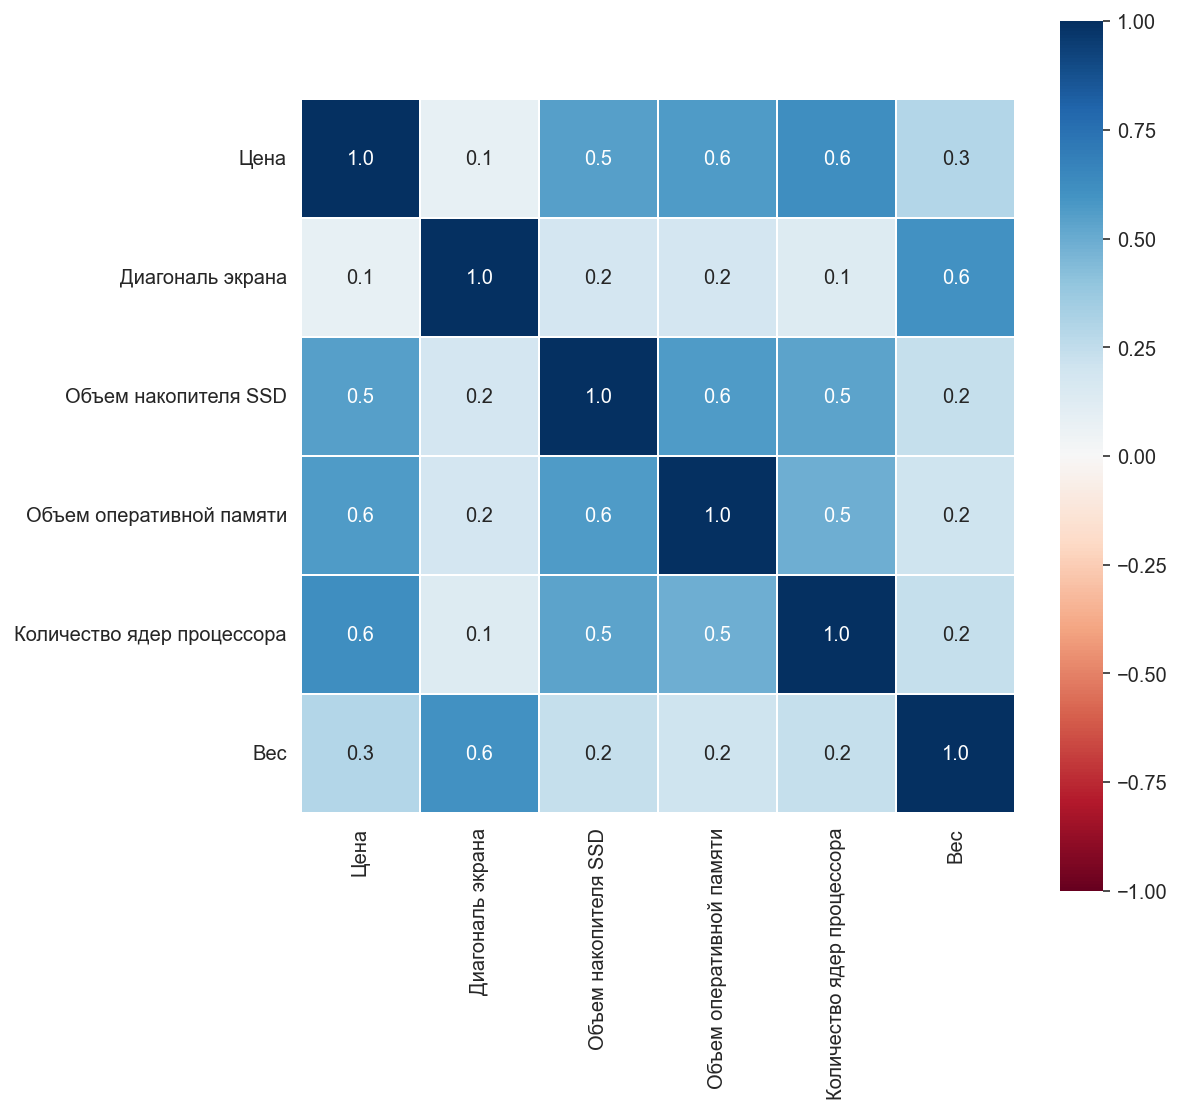

In [58]:
plt.figure(figsize = (8, 8))
k = df[df.select_dtypes([np.number]).columns.values].corr()
sns.heatmap(k, square=True,  annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu", vmin=-1, vmax=1);

Сделаем несколько замечаний относительно построенной матрицы корреляций:

 - С ценой более всего коррелируют объем оперативной памяти и количество ядер процессора, также влияние оказывает объем накопителя SSD
 - Диагональ экрана слабо влияет на цену и другие признаки, однако есть одна логичная взаимосвязь: коэффициент корреляции между диагональю экрана и весом ноутбука равен 0,6. Это вполне логично: чем больше диагональ, тем тяжелее ноутбук. 
 - Прослеживается положительная взаимосвязь между оперативной памятью и количеством ядер процессора (ложная это корреляция или нет - сказать трудно (в интернете ничего кроме форумов типа mail.ru я не нашла).

Попробуем визуализировать эти взаимосвязи. Использовать классический ScatterPlot несколько нелогично (так как наши числовые переменные по большей части принимают значения их ограничного конечного множества). Для примера, вот ScatterPlot для Количества ядер процессора и Цены:

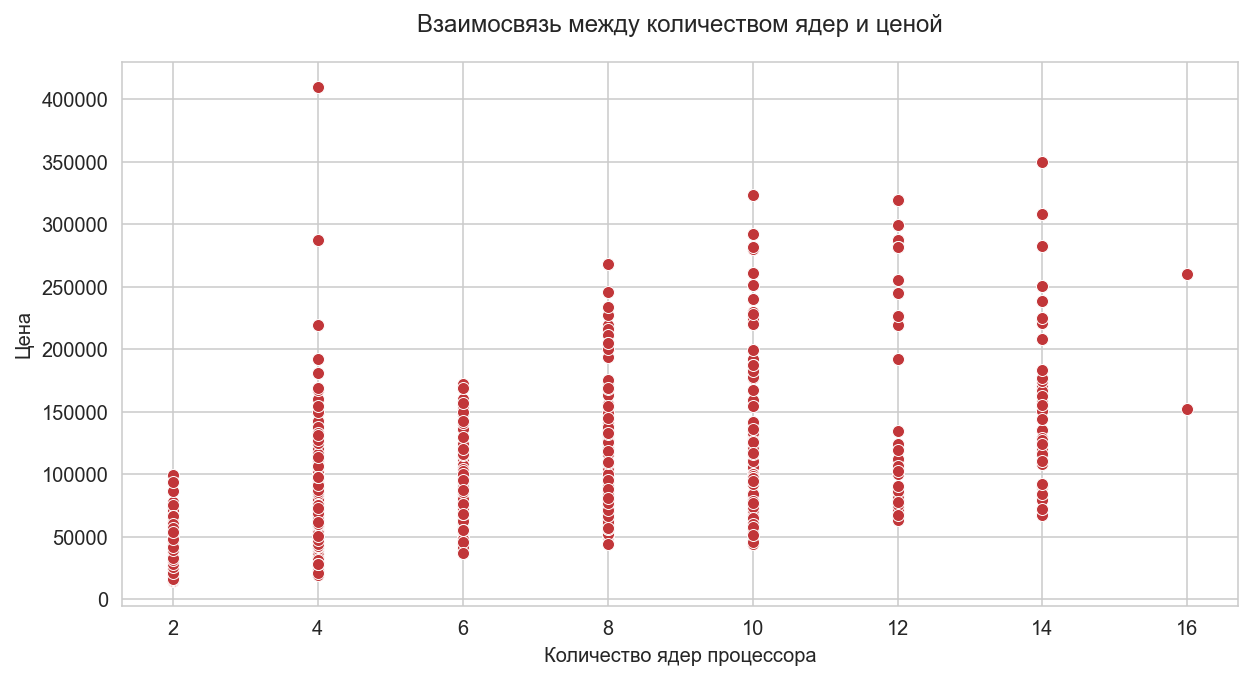

In [59]:
plt.figure (figsize = (10, 5))
sns.scatterplot(x = 'Количество ядер процессора', y = 'Цена', data = df)
plt.title('Взаимосвязь между количеством ядер и ценой', pad = 15);

Видно, что нижняя граница цены с ростом количества ядер увеличивается, но чёткой иллюстрации тому нет. Изобразим что-то более полезное - например, ящики с усами:

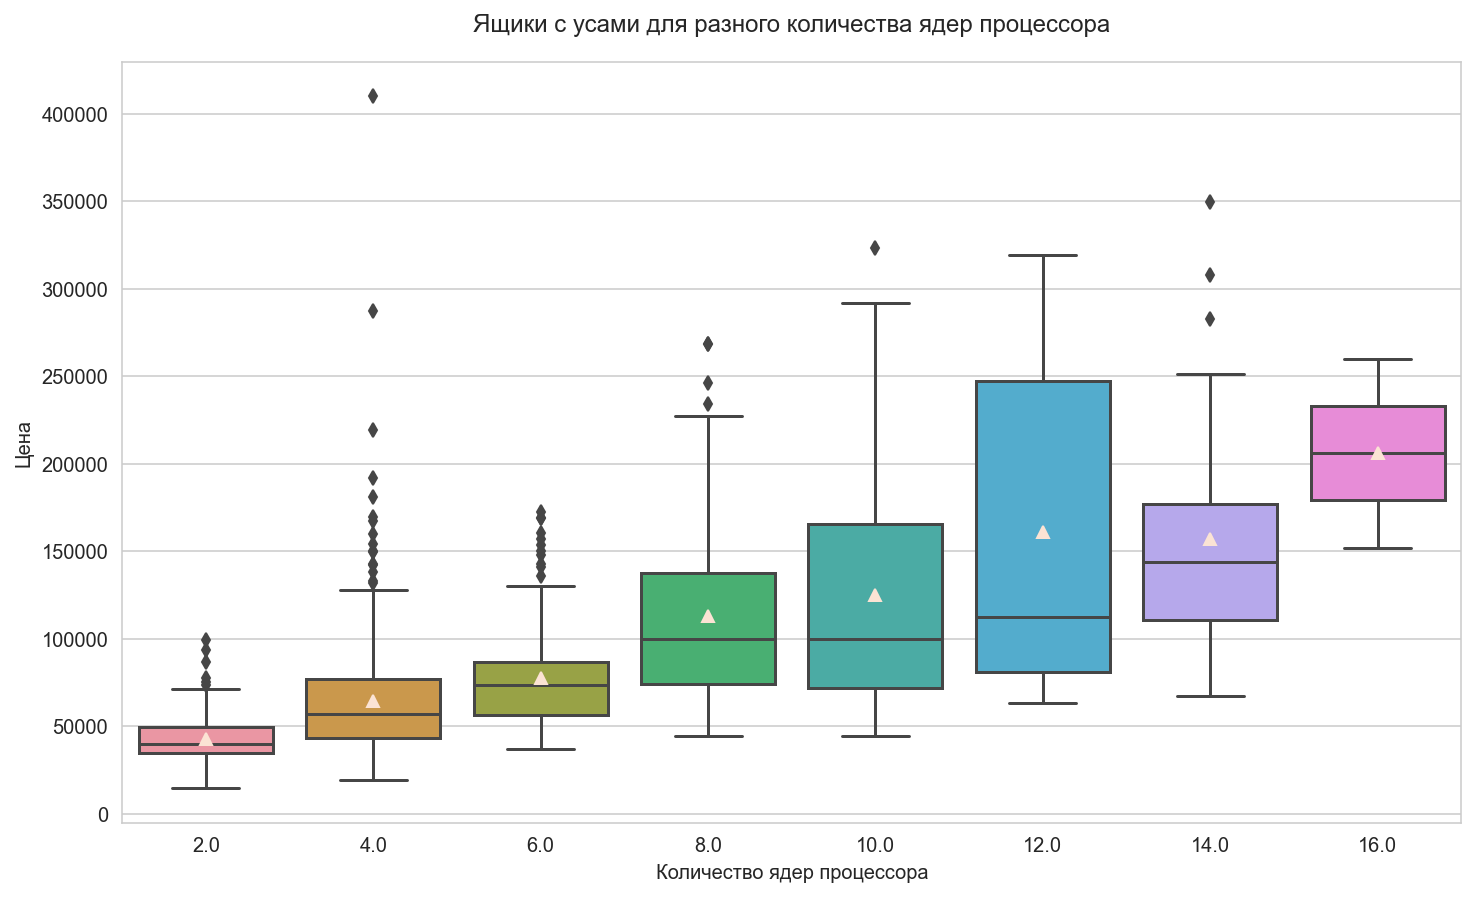

In [60]:
plt.figure (figsize = (12, 7))
sns.boxplot(x = 'Количество ядер процессора', y = 'Цена', data = df, showmeans=True)
plt.title('Ящики с усами для разного количества ядер процессора', pad = 15);

Или же нарисуем ViolinPlot для тех же целей:

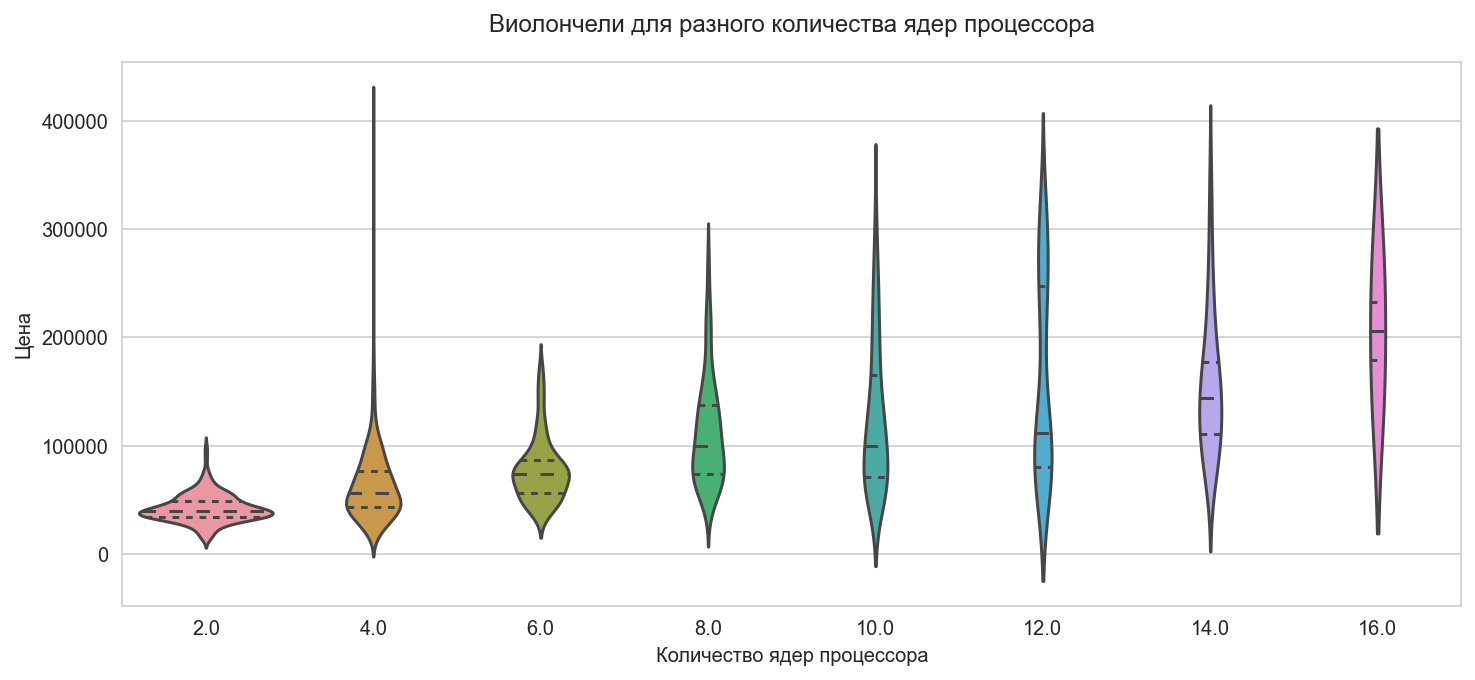

In [61]:
plt.figure (figsize = (12, 5))
sns.violinplot(x = 'Количество ядер процессора', y = 'Цена', 
               data = df, inner = 'quartile')
plt.title('Виолончели для разного количества ядер процессора', pad = 15);

Выглядит не очень показательно из-за большого разброса значений цены. Изобразим логарифм цены:

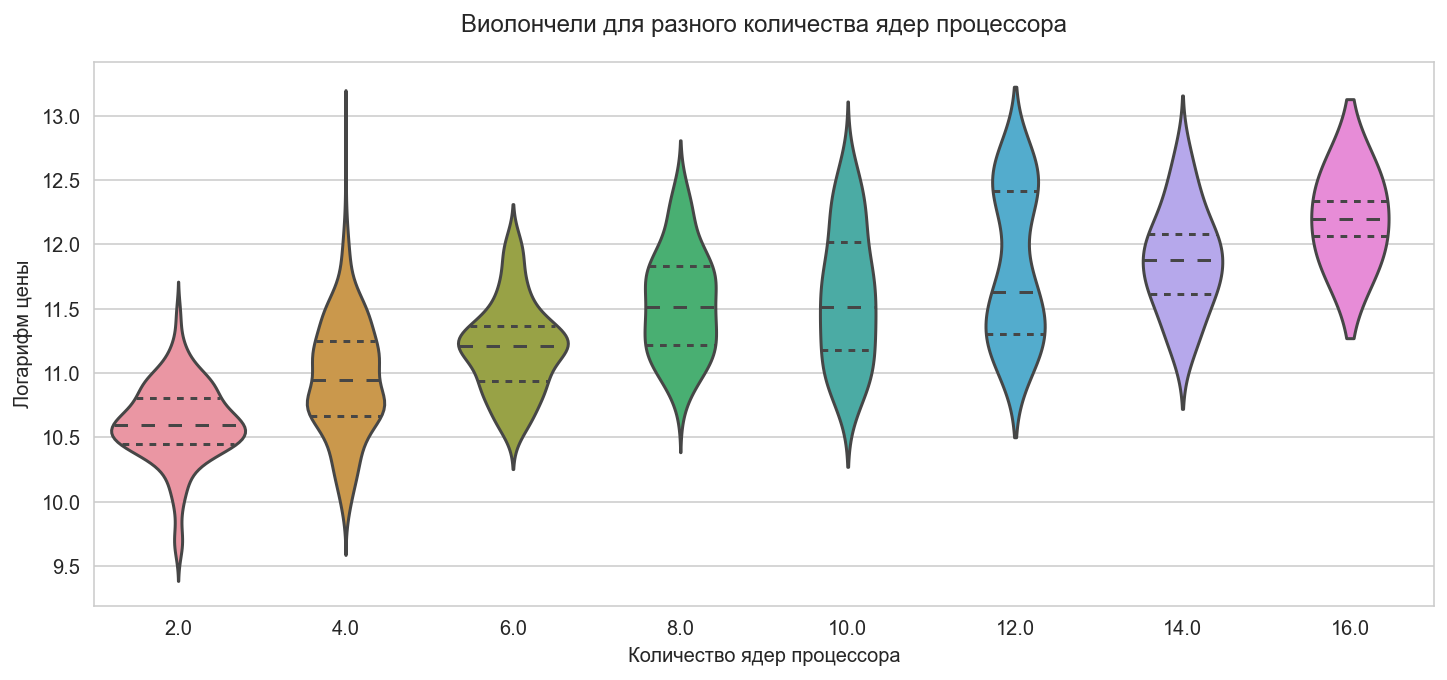

In [62]:
plt.figure (figsize = (12, 5))
sns.violinplot(x = df['Количество ядер процессора'], 
               y = df['Цена'].apply(lambda x: np.log(x+1)), 
               inner = 'quartile')
plt.ylabel('Логарифм цены')
plt.title('Виолончели для разного количества ядер процессора', pad = 15);

Так-то лучше!

Итак, как из ящиков с усами, так и из виолончелей можем видеть, что медиана (квантиль 50%), а также среднее значение (отмечено перевернутым треугольником на ящиках с усами) растет с ростом количества ядер процессора. Взаимосвязь положительная (что мы и видели по коэффициенту кореляции).

Выбросов довольно много: особенно для 4-х ядерных ноутбуков.

Аналогично посмотрим на взаимосвязь оперативной памяти и цены. Для начала посмотрим на объем оперативной памяти ка кна категориальную переменную:

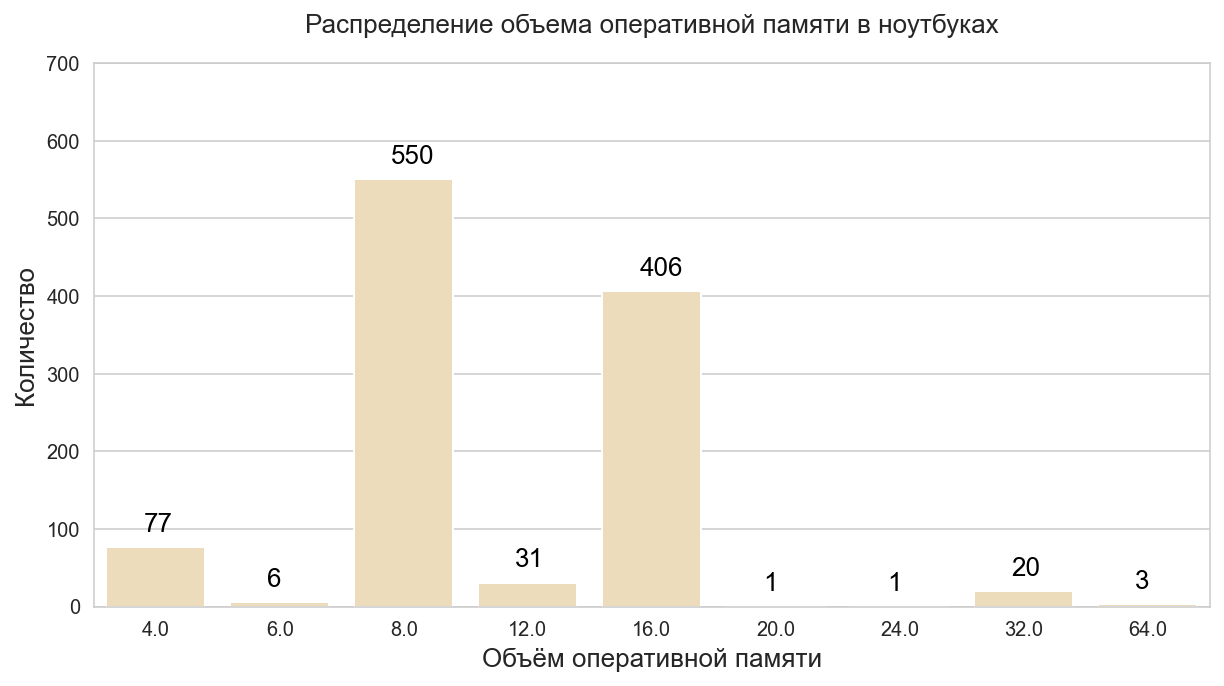

In [63]:
plt.figure (figsize = (10, 5))
fig = sns.countplot(x='Объем оперативной памяти', data=df, color = 'wheat')
plt.title ('Распределение объема оперативной памяти в ноутбуках', pad = 15, fontsize = 13)
plt.ylabel('Количество', fontsize = 13)
plt.xlabel('Объём оперативной памяти', fontsize = 13)
plt.ylim(0, 700)
for p in fig.patches:
    fig.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+20), color='black', size=13)

Заметим, что большинство ноутбуков имеют оперативную память в 8 или 16 ГБ. Временно создадим новую переменную, которая будет принимать два значения, означающих принадлежность объема оперативной памяти определенному промежутку.

In [64]:
df['Оперативная память'] = df['Объем оперативной памяти'] <= 8

In [65]:
df['Оперативная память'][df['Оперативная память']] = '8 Гб или меньше'
df['Оперативная память'][df['Оперативная память'] == False] = 'Более 8 Гб'

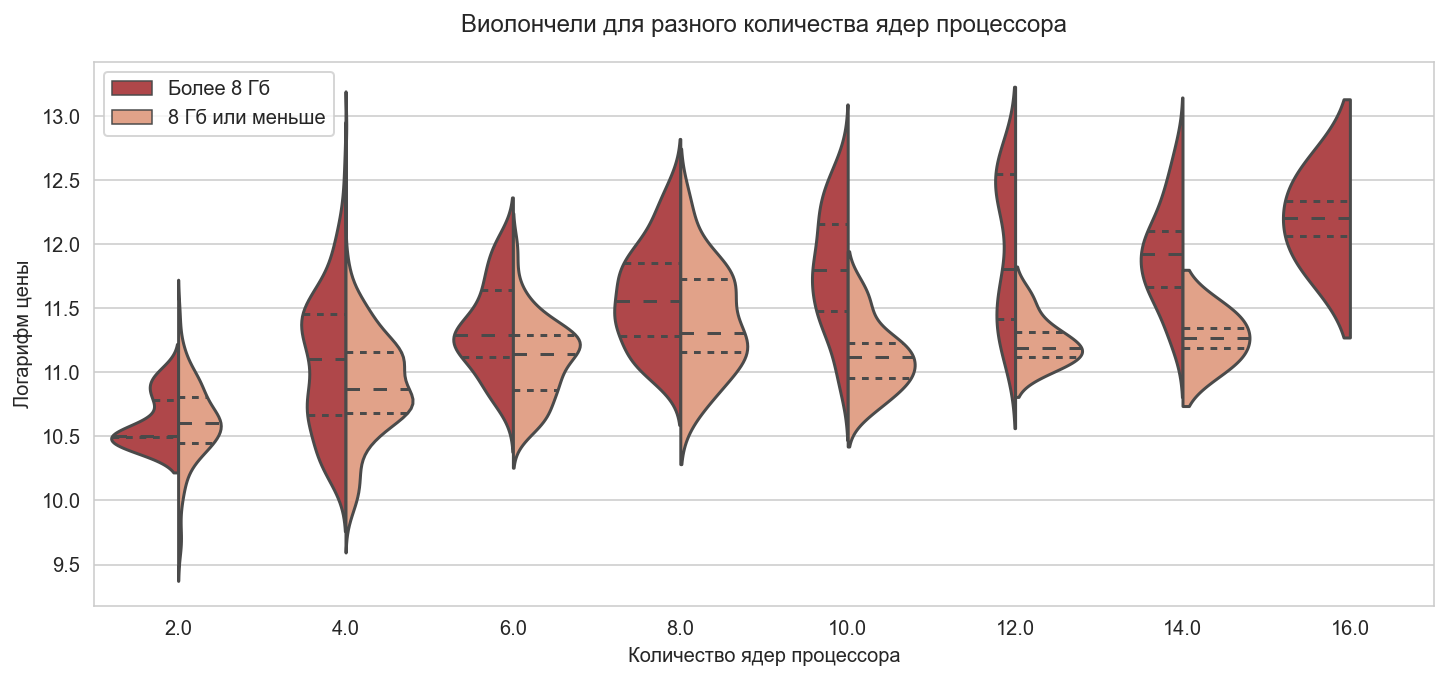

In [66]:
plt.figure (figsize = (12, 5))
sns.violinplot(x = df['Количество ядер процессора'], 
               y = df['Цена'].apply(lambda x: np.log(x+1)),
               hue = df['Оперативная память'], 
               inner = 'quartile', split = True)
plt.ylabel('Логарифм цены')
plt.title('Виолончели для разного количества ядер процессора', pad = 15)
plt.legend(loc = 'upper left');

Итак, из графика видим следующее:

 - Для двухядерных компьютеров медианное значение логарифма цены выше для ноутбуков с меньшей оперативной памятью
 - В остальном медианное значение логарифма цны выше для ноутбуков с большей оперативной памятью.
 
 Более явно проследим это с помощью ящиков с усами:

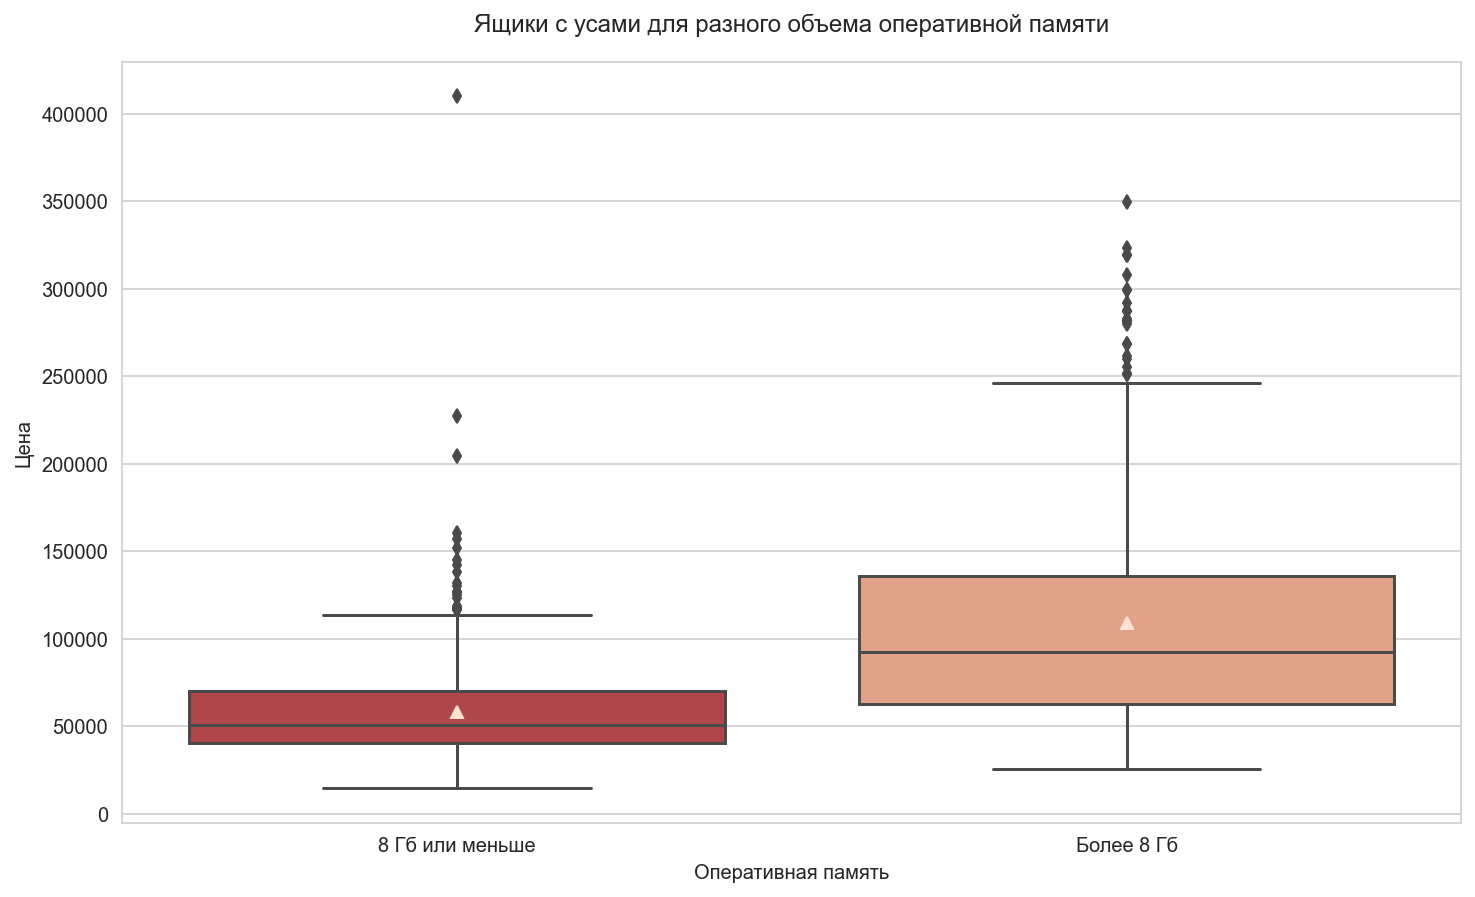

In [67]:
plt.figure (figsize = (12, 7))
sns.boxplot(x = 'Оперативная память', y = 'Цена', data = df, showmeans=True, order = ['8 Гб или меньше', 'Более 8 Гб'])
plt.title('Ящики с усами для разного объема оперативной памяти', pad = 15);

Действительно, в среднем ноутбуки с большей оперативной памятью стоят дороже (что также было видно из коэффициента корреляции). Кроме того, интересно, чем так хорош ноутбук за 400+ тысяч рублей с оперативной памятью в 8 Гб и меньше. Посмотрим на него.

In [68]:
df[(df['Цена'] > 400000) & (df['Объем оперативной памяти'] <= 8)]

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Вес,Операционная система,Оперативная память
207,Ноутбук HP 15s-eq2025ur 3B2X3EA,410000.0,15.6,512.0,8.0,4.0,NaN,3.1,Windows,8 Гб или меньше


Диагональ экрана стандартна, объем накопителя большой, но не терабайт и не 2 терабайта (а такие ноутбуки имеются!). Ноутбук не производства Apple, к тому же, он самый тяжелый из всей выборки. Интересно, чем он настолько хорош :) 

Теперь посмотрим на другие признаки.

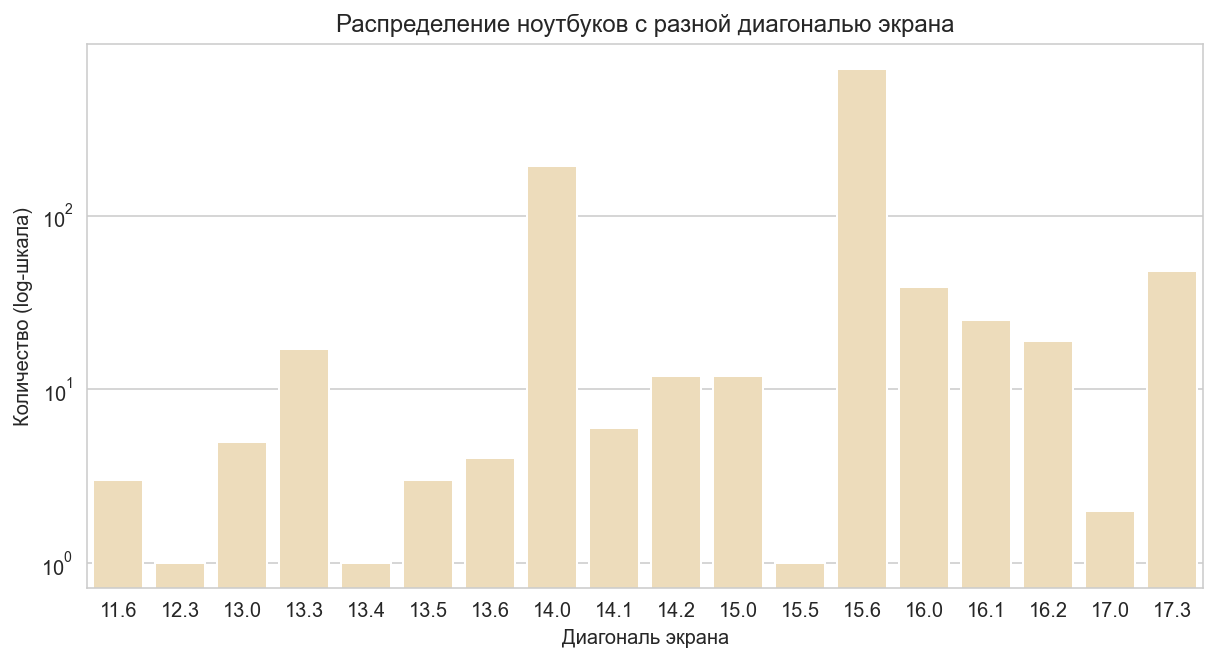

In [69]:
plt.figure (figsize = (10, 5))
sns.countplot(x = df['Диагональ экрана'], color = 'wheat', log = True)
plt.title('Распределение ноутбуков с разной диагональю экрана')
plt.ylabel('Количество (log-шкала)');

Сделаем визуализацию зависимости между диагональю экрана и весом:

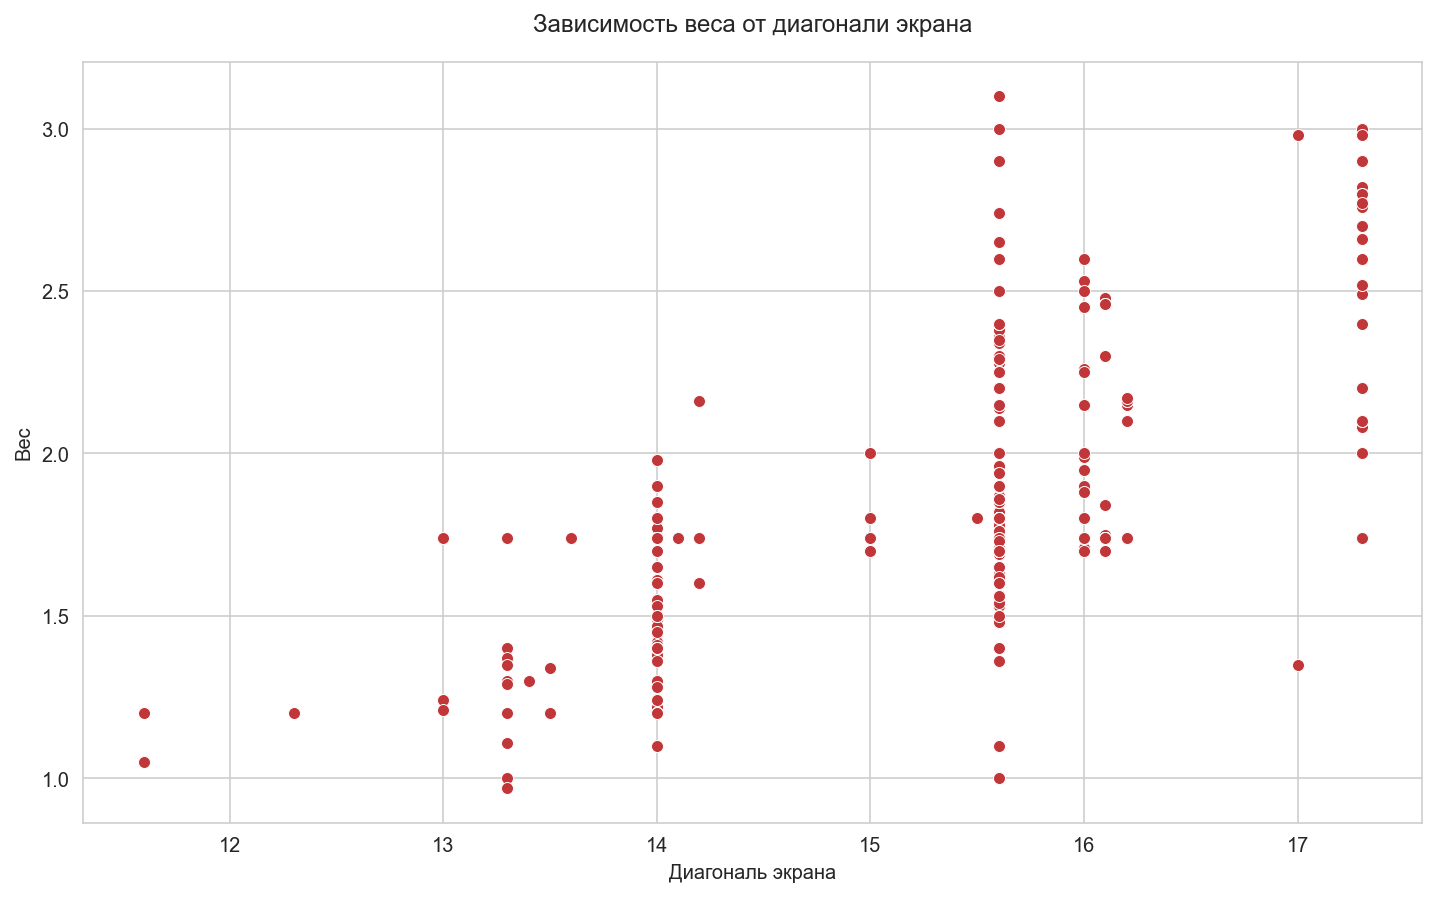

In [70]:
plt.figure (figsize = (12, 7))
sns.scatterplot(x = 'Диагональ экрана', y = 'Вес', data = df)
plt.title('Зависимость веса от диагонали экрана', pad = 15);

Несмотря на некоторую асбстрактность расположения точек, всё же видим, что вес имеет тенденцию к повышению по мере увеличения диагонали экрана.

## Шаг 5. Создание новых признаков

In [71]:
df = df.drop('Оперативная память', axis = 1)

Первый новый признак - является ли ноутбук продуктом компании Apple. Как мы видели, ценовой диапазон ноутбуков продукции Apple действительно выше, чем у ноутбуков других производств.

In [72]:
df['Is it MAC?'] = 1*(df['Операционная система'] == 'macOS')
print ('Коэффициент корреляции Пирсона =', np.corrcoef(df['Is it MAC?'],df['Цена'])[0, 1])

Коэффициент корреляции Пирсона = 0.5784323051954239


Видим, что даже коэффициент коореляции Пирсона (который вообще говоря не очень хорошо подходит для дамми-переменной), довольно высок. Данный признак действительно влияет на цену, поэтому будем его учитывать в качестве новой переменной.

Второй новый признак можно получить из колонки `Название`: попробуем понять, игровой ли ноутбук перед нами. С точки зрения логики это вполне может влиять на цену (но мы, конечно, это проверим).

In [73]:
df['Is it Gaming'] = (df['Название'].apply(lambda x: 'Игровой' in x or 'Game' in x or 'игровой' in x or 'game' in x
                                         or 'gaming' in x or 'Gaming' in x)) * 1
df.head()

,Название,Цена,Диагональ экрана,Объем накопителя SSD,Объем оперативной памяти,Количество ядер процессора,Комплектация,Вес,Операционная система,Is it MAC?,Is it Gaming
0,Ноутбук Megabook T1 (i5) 16/512Гб (Linux),43230.0,15.6,512.0,16.0,4.0,"документация, адаптер питания",1.48,Linux,0,0
1,"Ноутбук ASUS VivoBook 15 15.6""FHD OLED I5/8Gb/...",75800.0,15.6,512.0,8.0,4.0,"Ноутбук, зарядное устройство, документация",1.40,Windows,0,0
2,"Ноутбук 15.6"" Notebook Pink Intel Celeron N509...",32679.0,15.6,512.0,16.0,4.0,коробка; ноутбук; накладка на клавиатуру,1.74,noOS,0,0
3,Ноутбук Lenovo Ideapad 3 Intel Core i3-1115G4,39800.0,15.6,256.0,4.0,4.0,"Ноутбук, зарядное устройство, сетевой адаптер",1.50,Windows,0,0
4,"Ноутбук Acer Aspire 3 17.3""i5 1135G7/8Gb/512Gb...",76970.0,17.3,512.0,8.0,4.0,"Ноутбук, блок питания, документация",2.60,noOS,0,0


In [74]:
df['Is it Gaming'].corr(df['Цена'])

0.21913482751813493

Итак, мера линейной взаимосвязи - корреляция Пирсона для новой дамми-переменной и цены **положительна** и составляет почти 0.22. Видим, что взаимосвязь есть, но выражена она несильно. Тем не менее, этот признак имеет значение, а значит оставим его.


## Шаг 6. Проверка гипотез

Выдвинем некоторые предположения, возникшие у меня в результате анализа данных:

- Правда ли, что цена ноутбуков с операционной системой в среднем никак не отличается от цены ноутбуков без операционки?
- Влияет ли признак "Игровой ли ноутбук?" на цену?
- Влияет ли бренд "Apple" на цену?

Сформулируем гипотезы и попробуем их проверить.

#### №1. Операционка и цена ноутбуков

Составим вектор $x$, в котором будет лежать цена ноутбуков с установленной операционной системой. Аналогично вектор $y$ для ноутбуков без операционки. Тогда формулируем гипотезы в следующей форме:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x = \mu_y \\ 
&H_1: \hspace{2mm} \mu_x > \mu_y
\end{aligned}
$$

Альтернативная гипотеза - односторонняя, посколько нам важнее "поймать" случай, когда цена ноутбуков с операционкой выше цены ноутбуков без нее (по дефолту предполагаем, что обратная ситуация "невозможна" (а если происходит, то связана с иными факторами)). Проверять будем на **5%-ном** уровне значимости.

In [75]:
df['Есть ли ОС?'] = (df['Операционная система'] != 'noOS')

x = df[df['Есть ли ОС?']]['Цена'].values
y = df[~df['Есть ли ОС?']]['Цена'].values
x.shape, y.shape

((725,), (370,))

Видим, что ноутбуков без операционной системы меньше, однако число наблюдений для ноутбуков обеих групп достаточно высоко, что позволяет использовать ЦПТ. Как мы видели, в цене ноутбуков есть выбросы, что может cломать ЦПТ. Попробуем сначала ее применить, а потом поработать с выбросами/применим другой тест.

In [76]:
x.mean(), y.mean()

(81334.91172413793, 75181.98108108107)

На первый взгляд кажется, что в среднем ноутбуки без операционки стоят дешевле. Проверим, насколько это статистически значимо.

0.0204974303828257


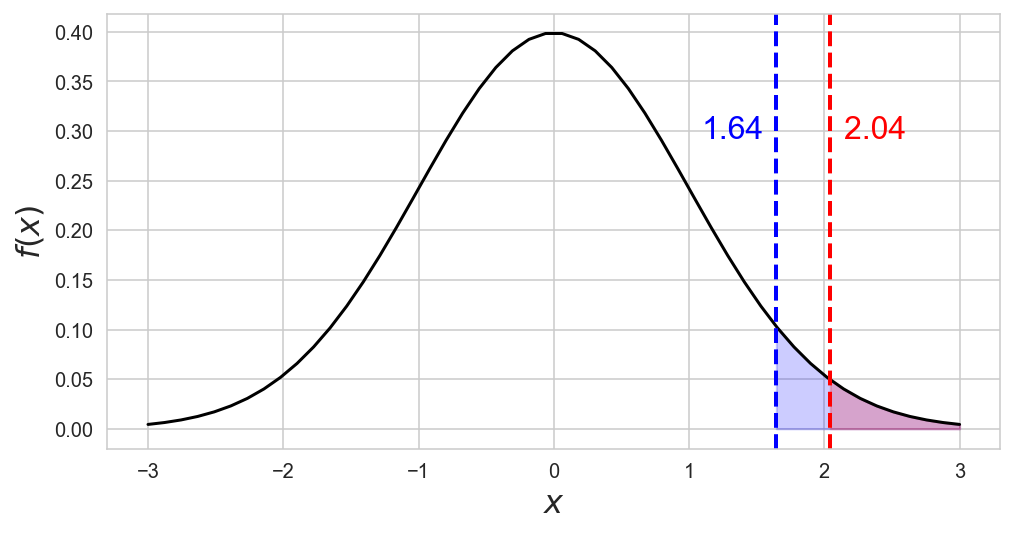

In [77]:
alpha = 0.05
z_obs = (x.mean()-y.mean())/np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)

p_value = 1 - sts.norm().cdf(z_obs)
z_crit = sts.norm().ppf(1 - alpha)

statistics = ['z_crit', 'z_obs']
params = dict(zip(statistics, [(z_crit, -0.55, z_crit, 3, 'b'),
                                (z_obs, 0.1, z_obs, 3, 'r')]))


plt.figure(figsize = (8, 4))
a = np.linspace(-3, 3)
pdf = sts.norm().pdf(a)

plt.plot(a, pdf, color="black")
plt.ylabel("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=16)
y_max = plt.ylim()[1]

for i in range(len(statistics)):
    statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]

    plt.axvline(statistic, color=color, linestyle="--", lw=2)
    plt.text(statistic + text_margin, 
             0.7*y_max, round(statistic, 2), color=color, fontsize=16)

    xq = np.linspace(left_bound, right_bound)
    yq = sts.norm().pdf(xq)
    plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
print (p_value)

P-value составляет 0.02. Это ниже уровня значимости (0.05), что означает, что гипотеза о равенстве цен ноутбуков с и без операционки отвергается (то есть разница в средних ощутима!).

Но вдруг ЦПТ сломалась и дала нам неверный вывод? (это возможно, так как в данных есть выбросы, причем сильные). Посмотрим еще раз на распределение.

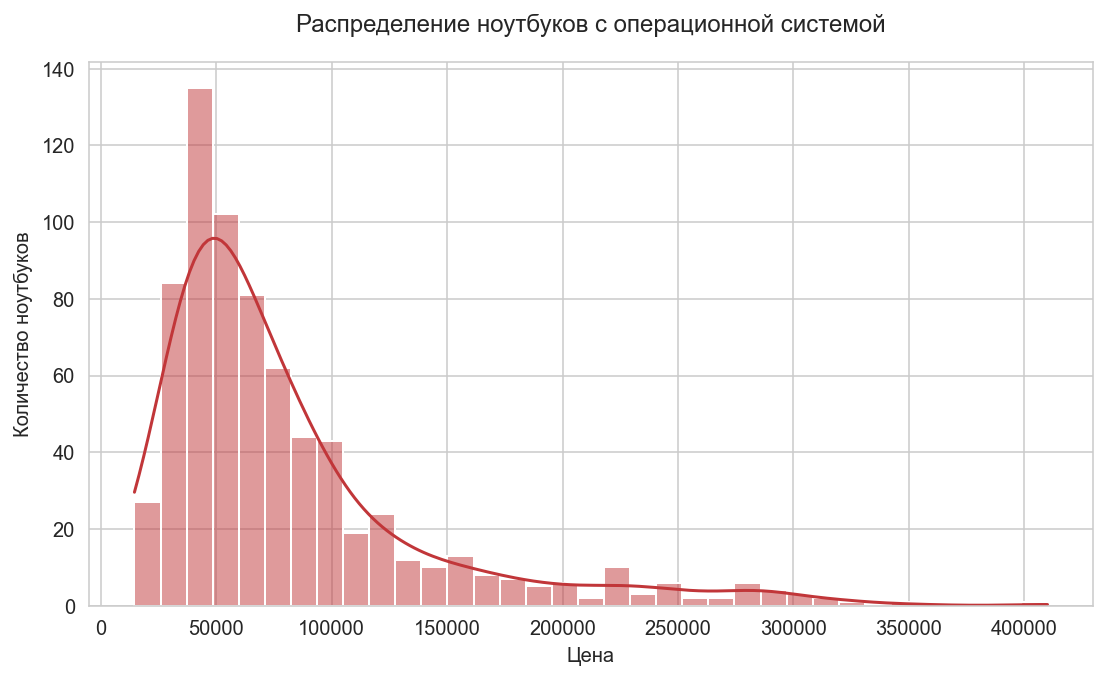

In [78]:
plt.figure (figsize = (9, 5))
sns.histplot(x, kde = True);
plt.xlabel('Цена')
plt.ylabel('Количество ноутбуков')
plt.title ('Распределение ноутбуков с операционной системой', pad = 15);

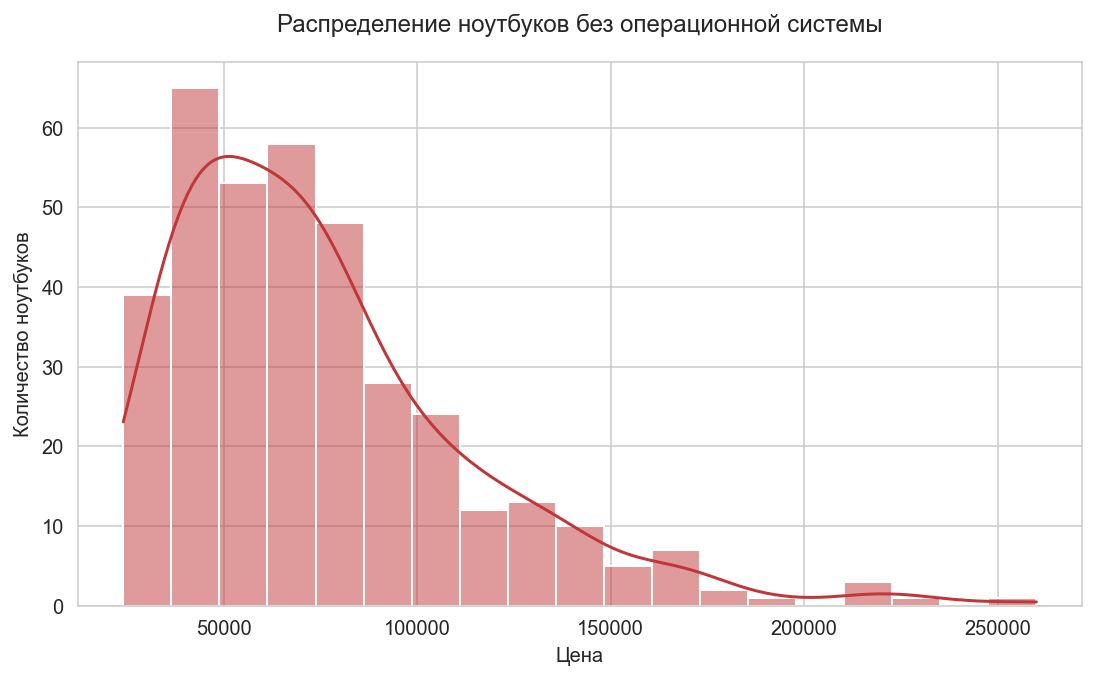

In [79]:
plt.figure (figsize = (9, 5))
sns.histplot(y, kde = True);
plt.xlabel('Цена')
plt.ylabel('Количество ноутбуков')
plt.title ('Распределение ноутбуков без операционной системы', pad = 15);

Действительно: в обоих массивах правый хвост распределения очень удлиненный (выбросам привет).

Попробуем тест **Манна-Уитни**: он устойчив к выбросам. Альтернатива - односторонняя, знак "больше", а значит используем `greater`

In [80]:
_, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval

0.8378113141428929

Видим, что гипотеза о равенстве средних НЕ отвергается (p-value сильно выше 0.05). При этом кажется, что тест Манна-Уитни должен работать, ведь похоже на то, что распределение цен ноутбуков с и без операционки не отличается, мы действительно ищем в нем сдвиг.

Говоря проще, нет оснований полагать, что в среднем ноутбуки с операционной системой стоят дороже. Bad for them :)

#### №2. Gaming VS NON-gaming

Проверим, влияет ли игровой характер ноутбука (звучит смешно, как иначе выразиться - без понятия :) ) на цену. Начнем с классики - асимптотический z-тест на 5%. Формулируем гипотезу аналогично:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x = \mu_y \\ 
&H_1: \hspace{2mm} \mu_x > \mu_y
\end{aligned}
$$

In [81]:
df['Gaming'] = df['Is it Gaming'].apply(bool)

In [82]:
x = df[df['Gaming']]['Цена'].values
y = df[~df['Gaming']]['Цена'].values
x.shape, y.shape

((63,), (1032,))

In [83]:
x.mean(), y.mean()

(127032.98412698413, 76339.21124031008)

Разница есть (и выглядит она довольно значительно). Проверим, насколько она статистически значима.

In [84]:
z_obs = (x.mean() - y.mean()) / np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)
p_value = 1 - sts.norm().cdf(z_obs)
p_value < 0.05

True

Получаем  вывод: гипотеза отвергается на 5% уровне значимости.

In [85]:
p_value < 0.01

True

Более того, на 1% гипотеза о равенстве мат.ожиданий отвергается! Разница получилась статистически значимой.

Посмотрим на распределение (возможно, выводы исказили выбросы). Также заметим, что наблюдений для использования ЦПТ вполне достаточно.

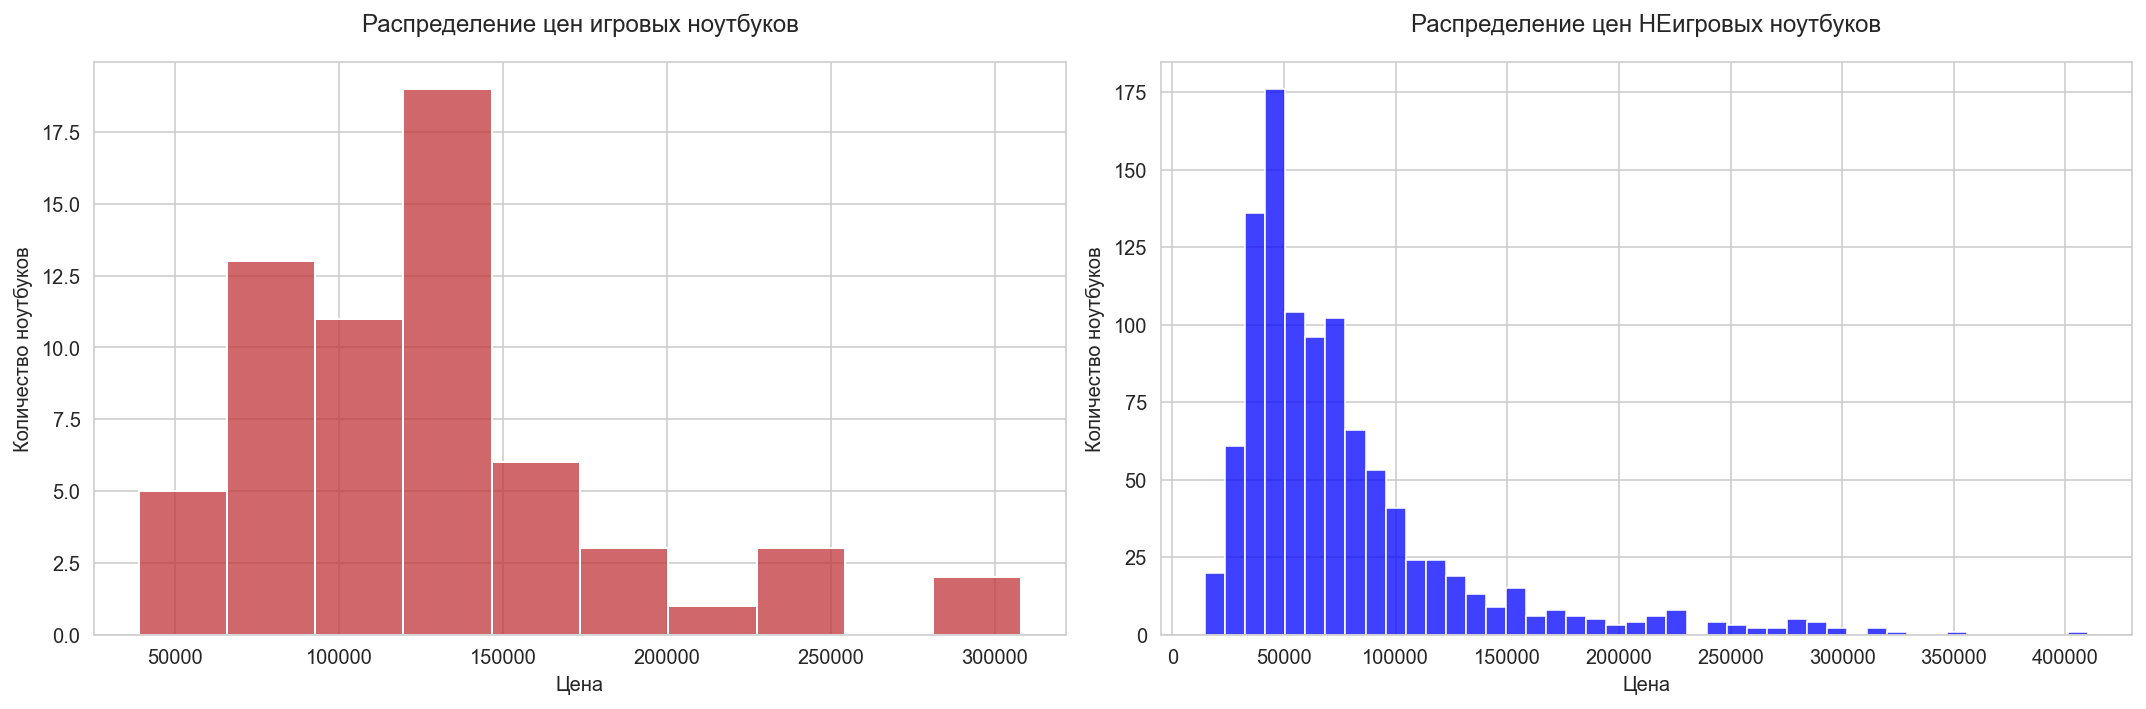

In [86]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x, ax = axes[0])
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество ноутбуков')
axes[0].set_title('Распределение цен игровых ноутбуков', pad = 15)

sns.histplot(y, ax = axes[1], color = 'blue')
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Количество ноутбуков')
axes[1].set_title('Распределение цен НЕигровых ноутбуков', pad = 15)
plt.tight_layout()

Выбросы, конечно имеются. Однако отметим, что в наибольшей степени исказить среднее могут очень высокие цены НЕигровых ноутбуков. Тогда среднее может быть завышено! Но даже если оно завышено, разница в ценах чувствуется (мы получили, что в среднем игровые ноутбуки стоят дороже даже при условии того, что среднее значение неигровых ноутбуков завышено). При этом выбросы у игровых ноутбуков не настолько сильные (в удлиненный правый хвост попали 5 ноутбуков - не так критично).

И снова проведем тест Манна-Уитни:

In [87]:
_, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval < 0.01

True

Получаем аналогичный вывод: гипотеза о равенстве мат.ожиданий отвергается! Все-таки игровые ноутбуки стоят дороже, поэтому оставим этот признак для машинного обучения.

#### №3. Эпл Или Не Эпл

Как уже видели раньше (много раз...) в данных действительно есть выбросы. Гипотезы сформилируем аналогчино прошлым пунктам и проверим их по тому же алгоритму

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x = \mu_y \\ 
&H_1: \hspace{2mm} \mu_x > \mu_y
\end{aligned}
$$

In [88]:
x = (df[df['Is it MAC?'] == 1] ['Цена']).values
y = (df[df['Is it MAC?'] != 1] ['Цена']).values

x.mean(), y.mean()

(220235.64705882352, 72368.89463601532)

In [89]:
z_obs = (x.mean() - y.mean()) / np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)
p_value = 1 - sts.norm().cdf(z_obs)
p_value < 0.01

True

In [90]:
_, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval < 0.01

True

Гипотеза о равенстве мат.ожиданий действительно отверглась - это означает, что ноутбуки продукции Apple в среднем стоят дороже, а значит этот признак может быть важным при машинном обучении.

## Шаг 7. Машинное обучение

 - **Поставленная задача:** 
Предсказание цены ноутбука по его характеристикам


 - **Чем это может быть полезно?** 
Новому производителю не всегда понятно, какую цену устанавливать на собственную продукцию. Данная модель может помочь с определением цены.


 - **Как это будет реализовано?** 
Будем использовать модель линейной регрессии с таргетом `Цена ноутбука` (признак может быть преобразован, об этом ниже). Объяснящие переменные - `Диагональ экрана`, `Объем накопителя SSD`,`Объем оперативной памяти`, `Количество ядер процессора`, `Вес`, `Is it MAC?`, `Is it Gaming` (также будут преобразованы, об этом ниже).

Начнем с создания новой таблицы с нужными нам признаками. К примеру, признак `Операционная система` был преобразован в дамми-переменную `Есть ли ОС?`, а оснований считать, что новая переменная влияет на цену, нет (см. пункт про гипотезы). Значит для машинного обучения он нам не нужен.

In [91]:
X_1 = df[['Диагональ экрана', 'Объем накопителя SSD' ,'Объем оперативной памяти', 
          'Количество ядер процессора', 'Вес', 'Is it MAC?', 'Is it Gaming']]

In [92]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Диагональ экрана            1095 non-null   float64
 1   Объем накопителя SSD        1095 non-null   float64
 2   Объем оперативной памяти    1095 non-null   float64
 3   Количество ядер процессора  1095 non-null   float64
 4   Вес                         1095 non-null   float64
 5   Is it MAC?                  1095 non-null   int32  
 6   Is it Gaming                1095 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 51.5 KB


Итак, все наши признаки являются количественными (или изначально, или были переведены в количественные). Пропущенных значений также нет (они были заполнены медианой/нулём etc. в шаге "Предварительная обработка данных"). Запишем таргет в отдельную переменную.

In [93]:
Y = df['Цена']

Ранее было показано, что разброс значений цены очень высок (к тому же, много выбросов). Взяв логарифм от цены, мы показали, что распределение цены походит на нормальное. С такими данными куда удобнее работать. Поэтому будем предсказывать не саму цену, а логарифм от неё.

Применим соответствующие преобразования и повторим упомянутую гистограмму.

In [94]:
Y = Y.apply(lambda x: np.log(x+1))

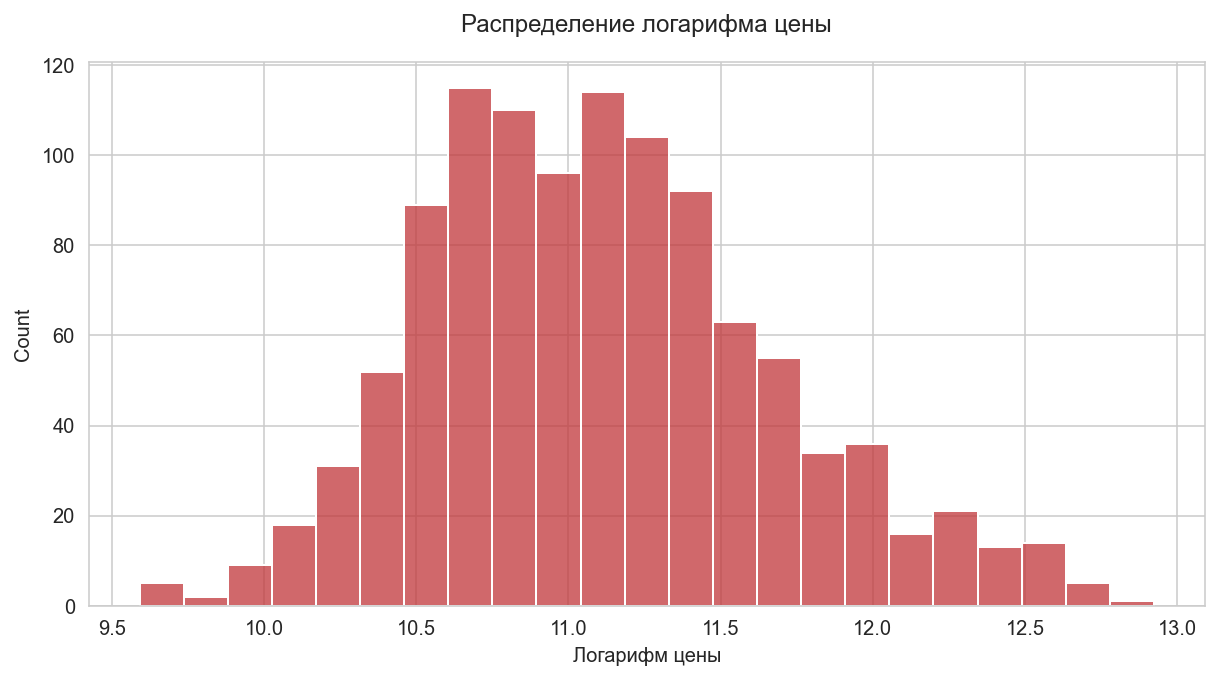

In [95]:
plt.figure (figsize = (10, 5))
sns.histplot(Y)
plt.title('Распределение логарифма цены', pad = 15)
plt.xlabel('Логарифм цены');

Обработку таргета закончили! Самое время приступать к обучению регрессии.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.2, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

Начнем с наивного прогноза: предскажем всем ноутбукам из тестовой выборки цену, равную среднему значению по обучающей выборке.

In [98]:
mse(y_test, y_train.mean()*np.ones(y_test.shape))

0.32760458395073777

Будем отталкиваться от этого значения среднеквадратичной ошибки: если получится результат MSE ниже, чем 0.328, значит модель работает лучше, чем наивный прогноз.

Сначала оставим обучающую и тестовую выборки без изменений и попробуем предсказать цену ноутбука без регуляризаторов. 

In [99]:
model = LR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mse(y_test, y_pred))
print("Train MSE = %.4f" % mse(y_train, y_train_pred))

Test MSE = 0.1190
Train MSE = 0.1355


In [100]:
model.coef_

array([-7.20474856e-02,  3.07982491e-04,  1.87413642e-02,  6.78472003e-02,
        3.34761258e-01,  6.88720281e-01,  2.03662168e-01])

Видим, что значение MSE значительно снизилось - на тестовой выборке оно составляет около 0.12 (а с наивным прогнозом около 0.33). Также отметим, что разбиение получилось каким-то очень удачным - на трейне модель показывает результат хуже, чем на тесте. Переобучения не случилось  :)

Теперь проведем нормировку данных (центрирование и скалирование).

In [101]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LR()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

print("Test MSE = %.4f" % mse(y_test, y_pred))
print("Train MSE = %.4f" % mse(y_train, y_train_pred))

Test MSE = 0.1190
Train MSE = 0.1355


In [102]:
lr.coef_

array([-0.06350983,  0.07764066,  0.10860847,  0.21281341,  0.10012014,
        0.13852259,  0.04940367])

Ничего не поменялось :(

Попробуем сделать кросс-валидацию:

In [103]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_1, Y, 
                            cv=10, scoring='neg_mean_squared_error')

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores), sep = '')
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	-0.1326
	-0.1767
	-0.1176
	-0.1308
	-0.1437
	-0.1337
	-0.1450
	-0.1241
	-0.1009
	-0.1409
Mean CV MSE = 0.1346


Результат сильно лучше!

Попробуем применить регуляризацию и подобрать соответствующий гиперпараметр (коэффициент регуляризации)

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 26.3665


In [105]:
model = Ridge(alpha=best_alpha) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mse(y_test, y_pred))
print("Train MSE = %.4f" % mse(y_train, y_train_pred))

Test MSE = 0.1227
Train MSE = 0.1401


In [106]:
model.coef_

array([-5.88966851e-02,  3.33499395e-04,  1.99082560e-02,  7.46194079e-02,
        2.24050897e-01,  3.69653948e-01,  1.27592823e-01])

Видим, что результат несколько ухудшился (регуляризация ограничивает величину коэффициентов, чтобы модель не переобучилась, поэтому такое вполне может быть). Ранее видели, что переобучения у нашей модели не случилось в принципе, поэтому, вероятно, регуляризация для нее излишняя. 

Отметим следующее: у всех обученных моделей коэффициент признака "Диагональ экрана" отрицателен (что демонстрирует, что никакой положительной связью тут и не пахнет). Удалим этот признак.

In [107]:
X_2 = X_1.drop('Диагональ экрана', axis = 1)

In [108]:
cv_scores = cross_val_score(model, X_2, Y, 
                            cv=10, scoring='neg_mean_squared_error')

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores), sep = '')
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	-0.1357
	-0.1827
	-0.1168
	-0.1390
	-0.1473
	-0.1484
	-0.1448
	-0.1312
	-0.1077
	-0.1458
Mean CV MSE = 0.1399


Подводя итог, отметим, что у остальных признаков коэффициенты положительные (что означает, что на цену каждый из признаков влияет положительно), причём наибольшие коэффициенты получились при признаках `Количество ядер процессора` и `Is it MAC?`, что демонстрирует важность количества ядер при формировании цены ноутбука и, конечно, влияние брендана его цену.

## Шаг 8. Общие выводы

Кажется, выводы по каждому пункту были написаны выше, поэтом только подытожу: рынок ноутбуков в России (как минимум, если смотреть на ассортимент WB) очень разнообразный: есть не очень дорогие ноутбуки с классными характеристиками (много ядер, большая память и т.д.), а есть очень дорогие с не очень хорошими характеристиками. Это усложняет процесс предсказания цены, ведь такие кейсы "путают" модель, из-за чего падают метрики качества. Тем не менее, мы увидели, что память, количество ядер, а также бренд-производитель ноутбука в большей степени определяют его цену. Со своей задачей мы справились :) 